In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import numpy as np
import warnings
warnings.filterwarnings ('ignore')
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Modelling
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR , SVC
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [4]:
df = pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',None)
df = pd.read_csv ("Processed_Flipdata - Processed_Flipdata.csv")
df.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


In [5]:
df.drop ("Unnamed: 0", axis = 1, inplace = True)

In [72]:
unique_values = set(df)
print(unique_values)

{'Front Camera', 'RAM', 'Processor_', 'Colour', 'Mobile Height', 'Model', 'AI Lens', 'Memory', 'Rear Camera', 'Prize', 'Battery_'}


## Missing values

In [8]:
df.isnull ().sum ()

Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

## Data Type

In [32]:
df.shape

(541, 11)

In [34]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          541 non-null    object 
 1   Colour         541 non-null    object 
 2   Memory         541 non-null    float64
 3   RAM            541 non-null    float64
 4   Battery_       541 non-null    float64
 5   Rear Camera    541 non-null    object 
 6   Front Camera   541 non-null    object 
 7   AI Lens        541 non-null    float64
 8   Mobile Height  541 non-null    float64
 9   Processor_     541 non-null    object 
 10  Prize          541 non-null    object 
dtypes: float64(5), object(6)
memory usage: 46.6+ KB


#### Numerical Value

In [12]:
# list of numerical variables
numerical_data = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_data))

# visualise the numerical variables
df[numerical_data].head(1)

Number of numerical variables:  5


,Memory,RAM,Battery_,AI Lens,Mobile Height
0,64,4,6000,1,16.76


#### Categorical Value

In [6]:
categorical_data = df.select_dtypes(include = "object").columns 
print('Number of categorical variables: ', len(categorical_data))
df [categorical_data].head (1)

Number of categorical variables:  6


,Model,Colour,Rear Camera,Front Camera,Processor_,Prize
0,Infinix SMART 7,Night Black,13MP,5MP,Unisoc Spreadtrum SC9863A1,"7,299"


### Data Describe

In [8]:
df.describe ()

,Memory,RAM,Battery_,AI Lens,Mobile Height
count,541.000000,541.000000,541.000000,541.000000,541.000000
mean,110.550832,5.397412,4871.587800,0.062847,16.431201
std,60.600694,1.984923,780.148862,0.242911,2.523553
min,16.000000,2.000000,800.000000,0.000000,4.500000
25%,64.000000,4.000000,5000.000000,0.000000,16.510000
50%,128.000000,6.000000,5000.000000,0.000000,16.710000
75%,128.000000,8.000000,5000.000000,0.000000,16.940000
max,256.000000,8.000000,7000.000000,1.000000,41.940000


###  AutoViz

In [1]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

Imported v0.1.904. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


Shape of your Data Set loaded: (541, 11)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    11 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
There are 10 duplicate rows in your dataset
    Alert: Dropping duplicate rows can sometimes cause your column data types to change to object!
    All variables classified into correct types.


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Model,object,0.000000,35,,,Possible high cardinality column with 187 unique values: Use hash encoding or text embedding to reduce dimension.
Colour,object,0.000000,51,,,Possible high cardinality column with 275 unique values: Use hash encoding or text embedding to reduce dimension.
Memory,int64,0.000000,0,16.000000,256.000000,Column has 55 outliers greater than upper bound (224.00) or lower than lower bound(-32.00). Cap them or remove them.
RAM,int64,0.000000,0,2.000000,8.000000,No issue
Battery_,int64,0.000000,6,800.000000,7000.000000,Column has 148 outliers greater than upper bound (5000.00) or lower than lower bound(5000.00). Cap them or remove them.
Rear Camera,object,0.000000,2,,,"4 rare categories: ['5MP', '40MP', '32MP', '16MP']. Group them into a single category or drop the categories."
Front Camera,object,0.000000,2,,,"5 rare categories: ['60MP', '2MP', '10MP', '20MP', '44MP']. Group them into a single category or drop the categories."
AI Lens,int64,0.000000,0,0.000000,1.000000,No issue
Mobile Height,float64,0.000000,NA,4.500000,41.940000,Column has 32 outliers greater than upper bound (17.59) or lower than lower bound(15.87). Cap them or remove them.
Processor_,object,0.000000,23,,,Possible high cardinality column with 123 unique values: Use hash encoding or text embedding to reduce dimension.


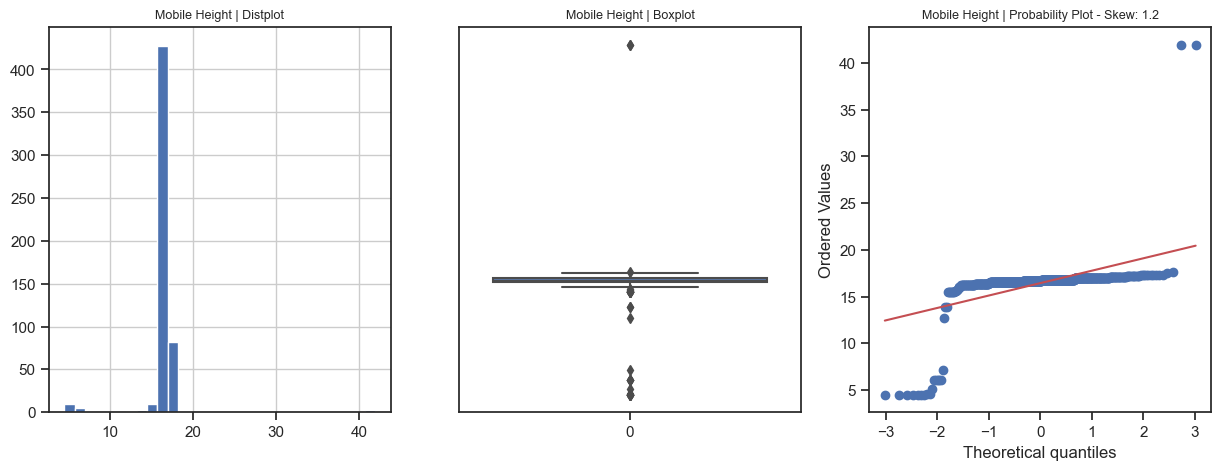

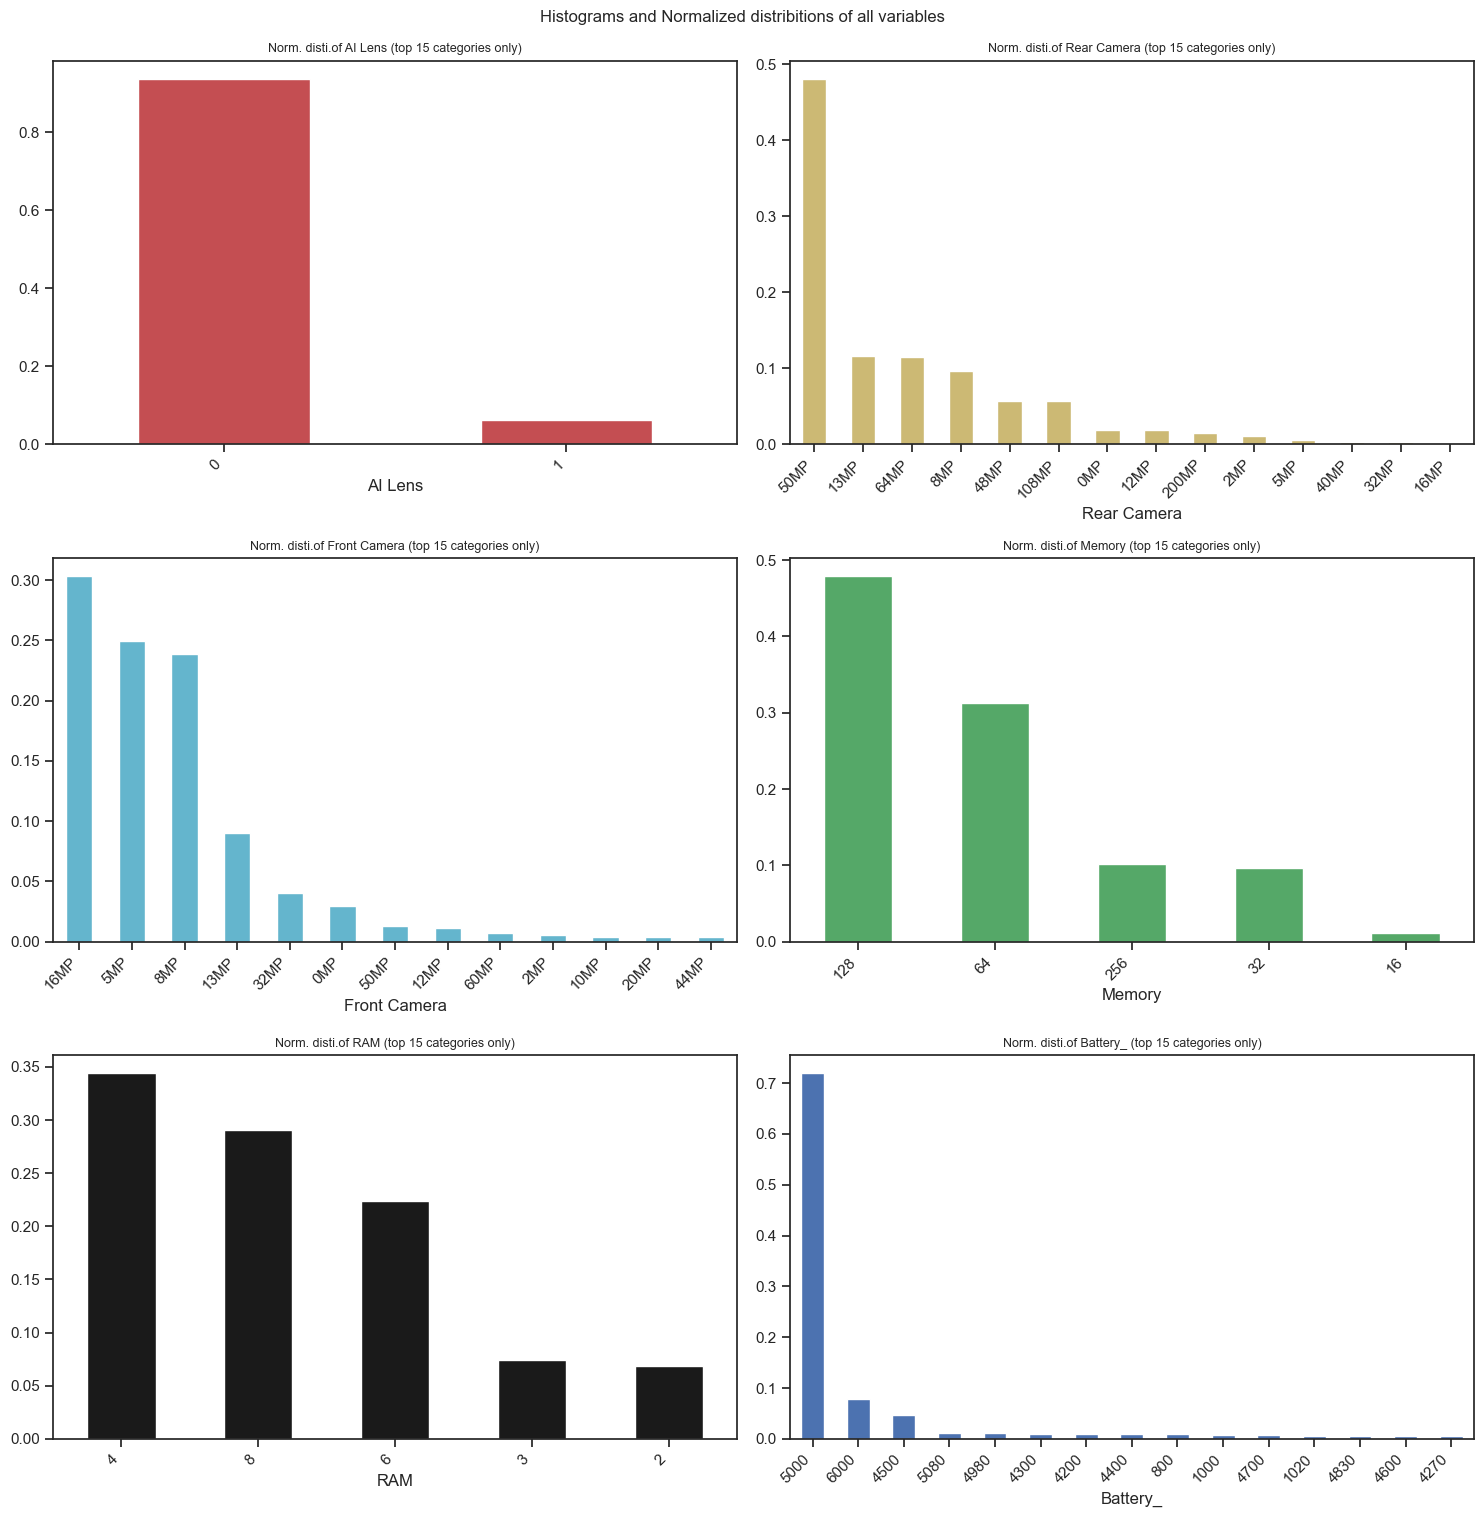

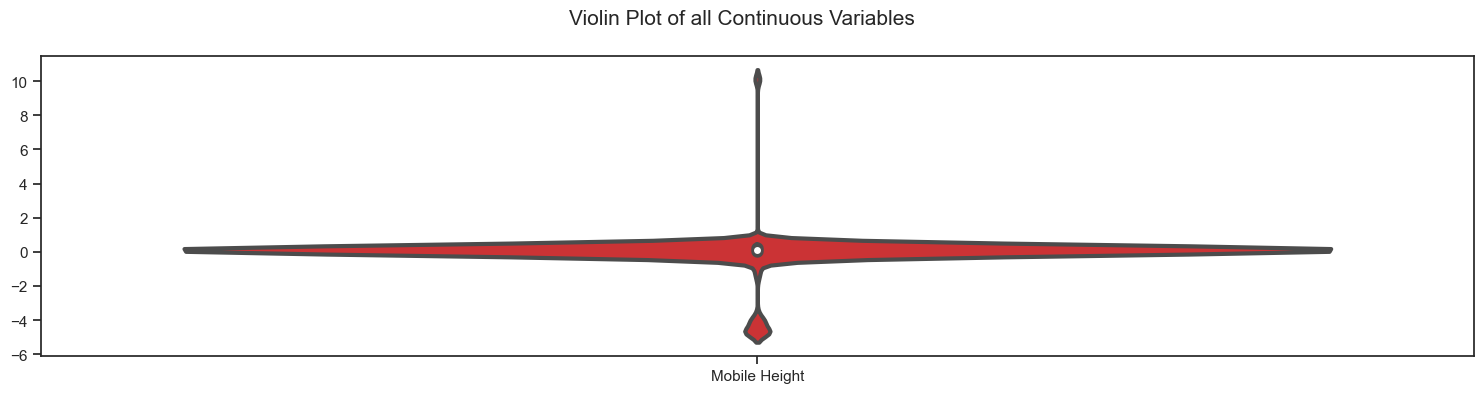

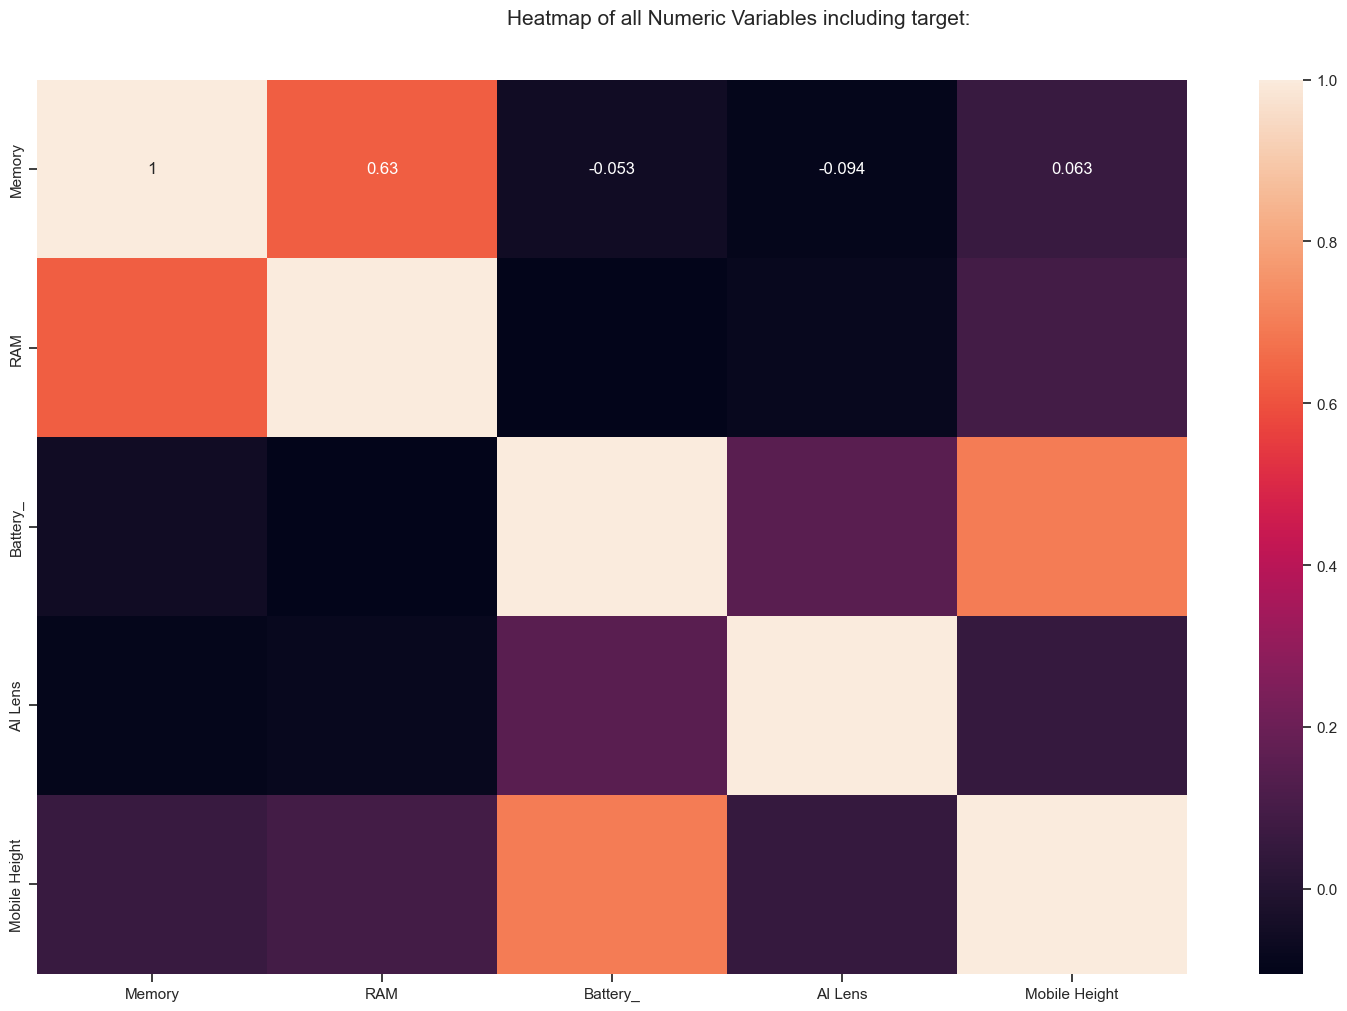

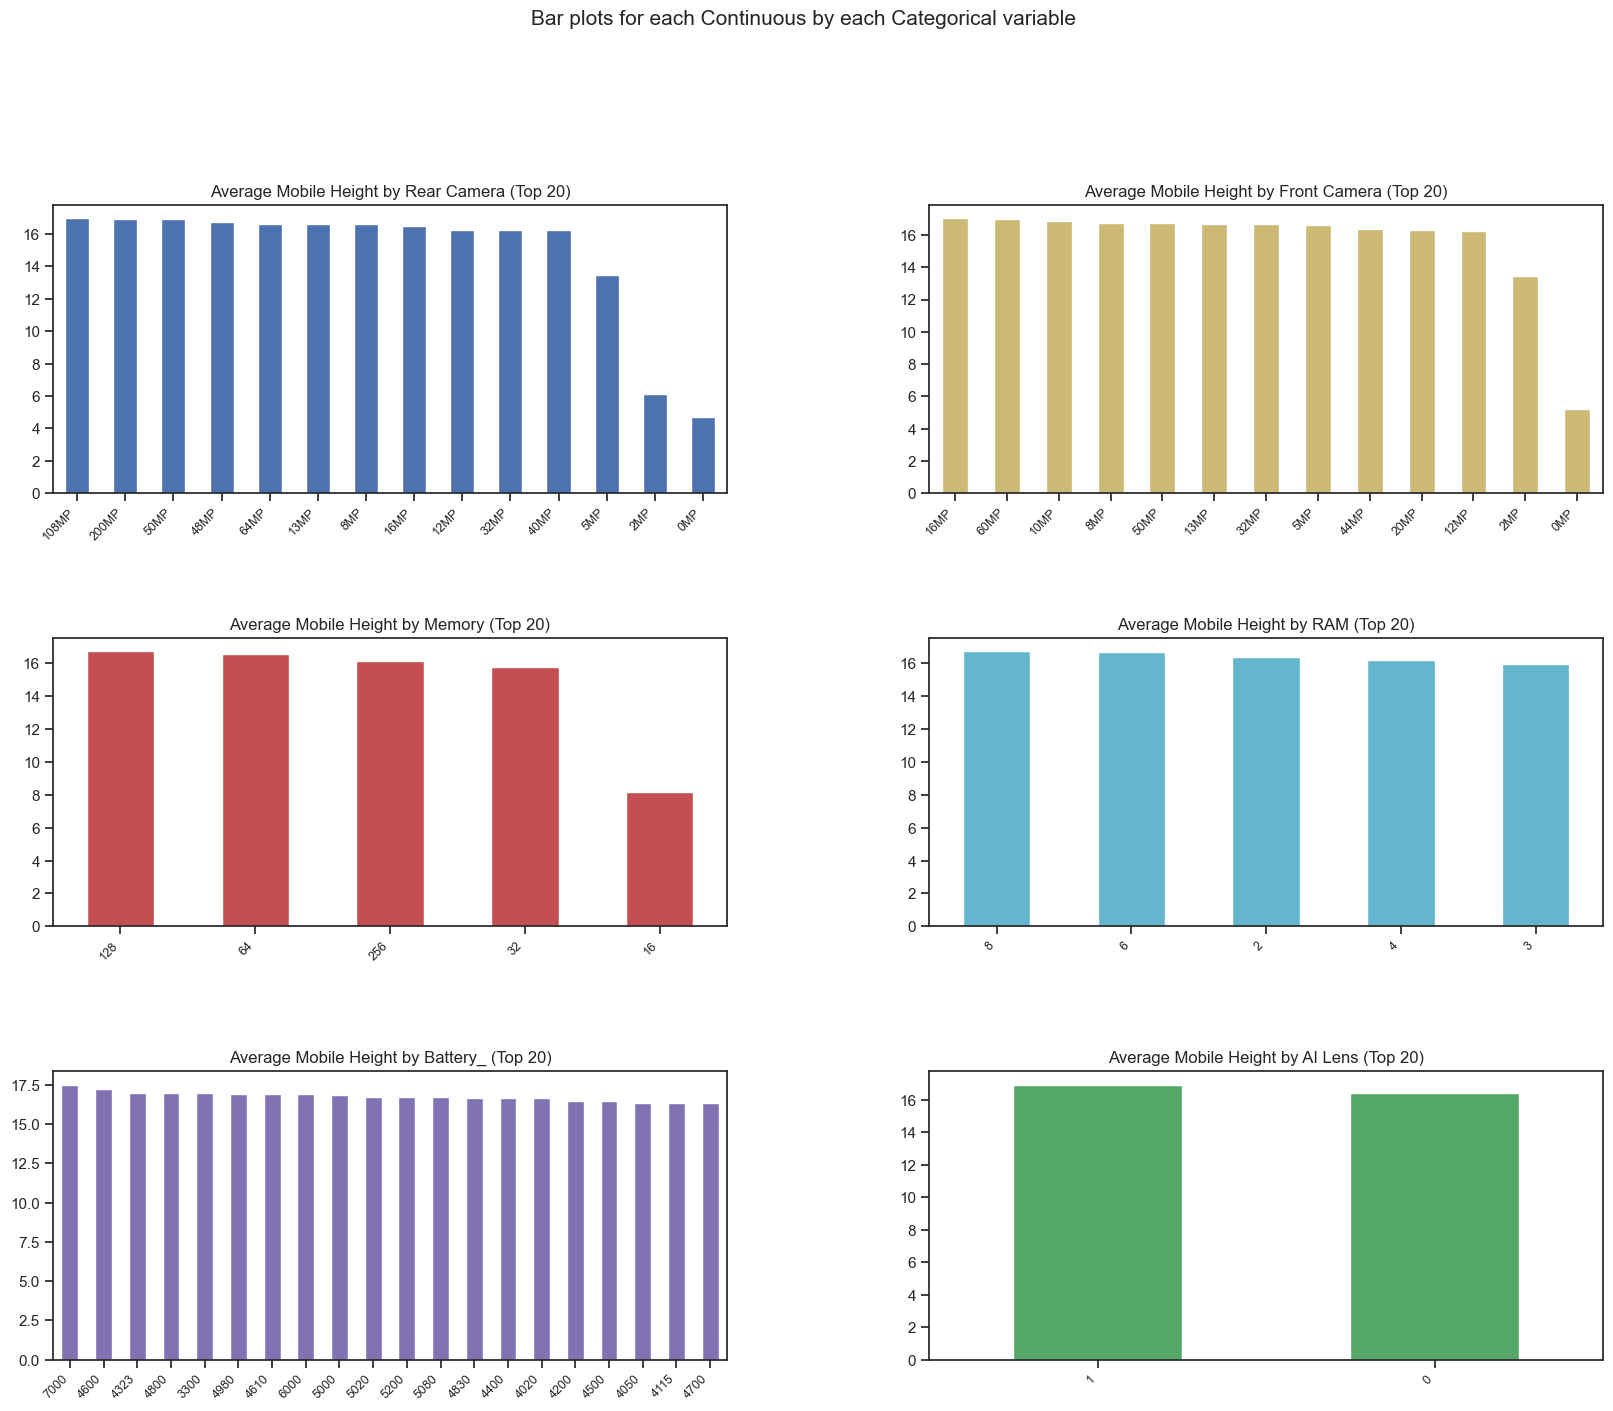

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |   

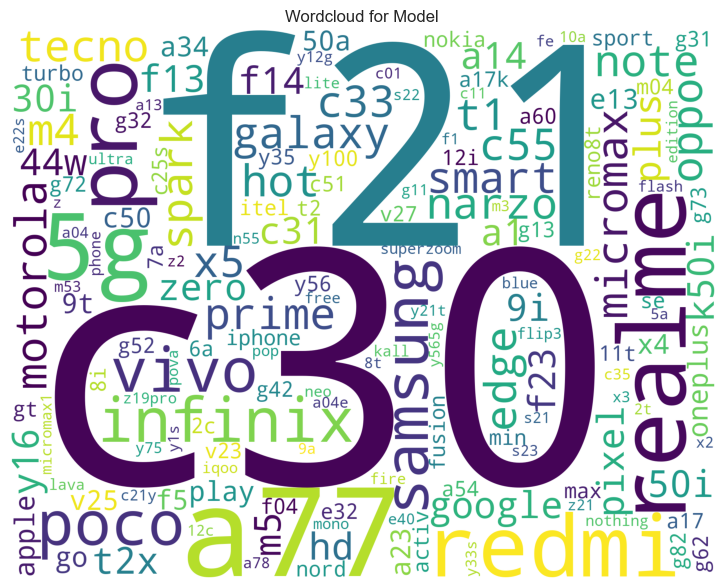

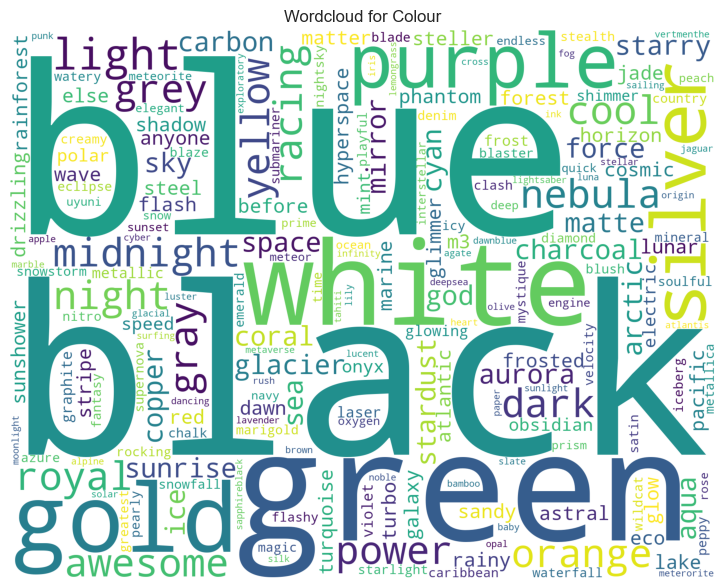

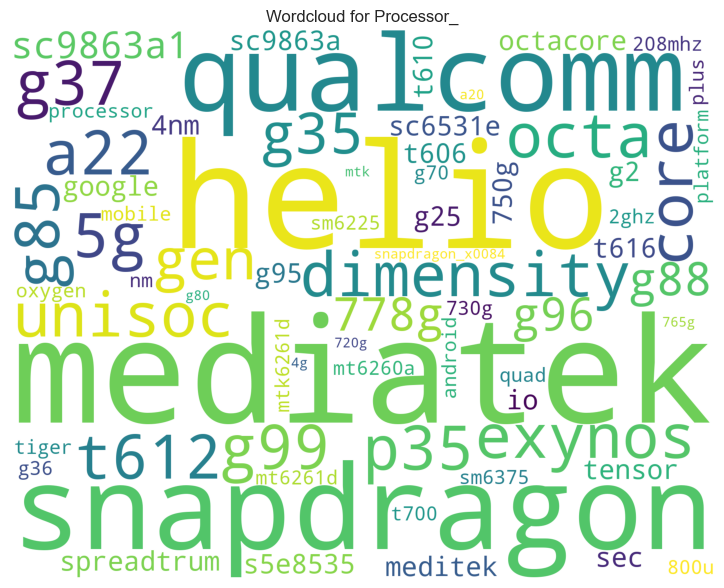

Could not draw wordcloud plot for Prize. We need at least 1 word to plot a word cloud, got 0.
All Plots done
Time to run AutoViz = 23 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


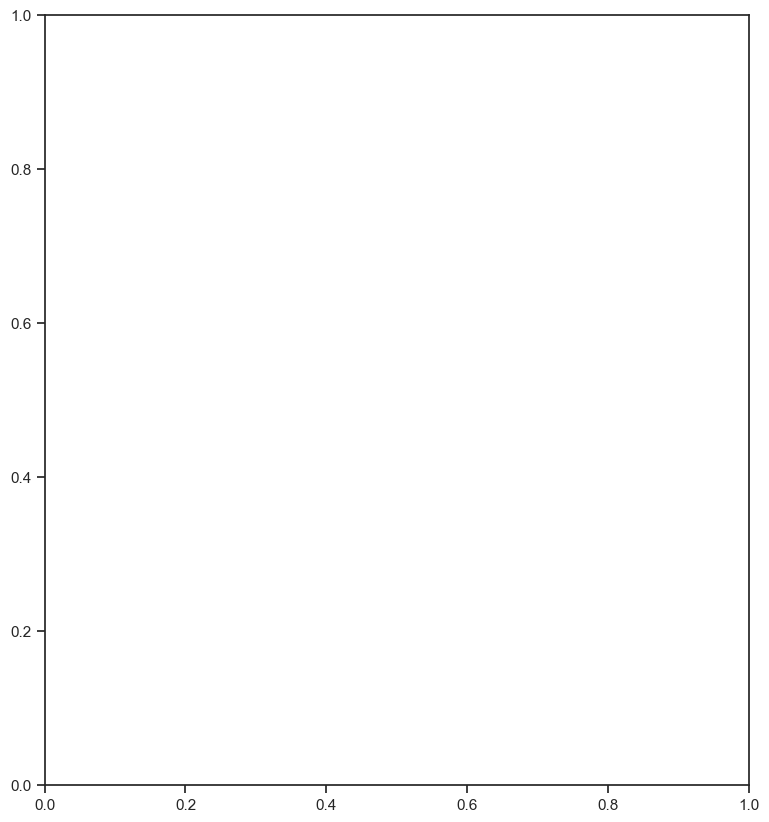

In [6]:
plt.rcParams['figure.figsize'] = [10, 6] 
sep = ","
dft = AV.AutoViz(
    df,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=1500,
    max_cols_analyzed=37,
    # explorative=True,
    #minimal=True ,
)
sns.set(rc={'figure.figsize':(10, 6)})
plt.show ()

### Unique Values

In [4]:
for i in df.columns:
    print (i , "=" , "\t"  , len (df[i].unique()) , "\t" , ":" , df[i].unique())


Model = 	 187 	 : ['Infinix SMART 7' 'MOTOROLA G32' 'POCO C50' 'Infinix HOT 30i' 'REDMI 10'
 'SAMSUNG Galaxy F13' 'SAMSUNG Galaxy F04' 'POCO C51' 'MOTOROLA e13'
 'vivo T2x 5G' 'Infinix Smart 7 HD' 'REDMI A1+' 'POCO C55' 'MOTOROLA g13'
 'POCO M4 5G' 'MOTOROLA e32' 'vivo T2 5G' 'MOTOROLA G62 5G' 'POCO M5'
 'realme C33 2023' 'SAMSUNG Galaxy F14 5G' 'MOTOROLA g73 5G' 'realme C30'
 'POCO X5 5G' 'POCO M4 Pro' 'REDMI 11 Prime' 'realme C55'
 'realme 10 Pro 5G' 'Micromax IN 2C' 'POCO M4 Pro 5G'
 'realme Narzo 30 Pro 5G' 'micromax 2' 'Infinix Note 12 Pro 5G'
 'SAMSUNG Galaxy F23 5G' 'micromax' 'MOTOROLA Edge 40' 'micromax 1'
 'realme Narzo 30' 'Infinix NOTE 12i' 'realme 10' 'realme 8i' 'Micromax 3'
 'Google Pixel 6a' 'Infinix HOT 20 5G' 'realme GT 2' 'REDMI Note 12'
 'REDMI Note 12 5G' 'micromax 3' 'SAMSUNG Galaxy M04' 'REDMI K50i 5G'
 'MOTOROLA e40' 'REDMI 9 Activ' 'MOTOROLA g42' 'realme C25s'
 'POCO X5 Pro 5G' 'POCO M3 Pro 5G' 'Infinix Smart 6 HD'
 'Infinix Hot 20 5G' 'realme C31' 'micromax1' 

### Skewness

In [9]:
df1 = df.copy ()

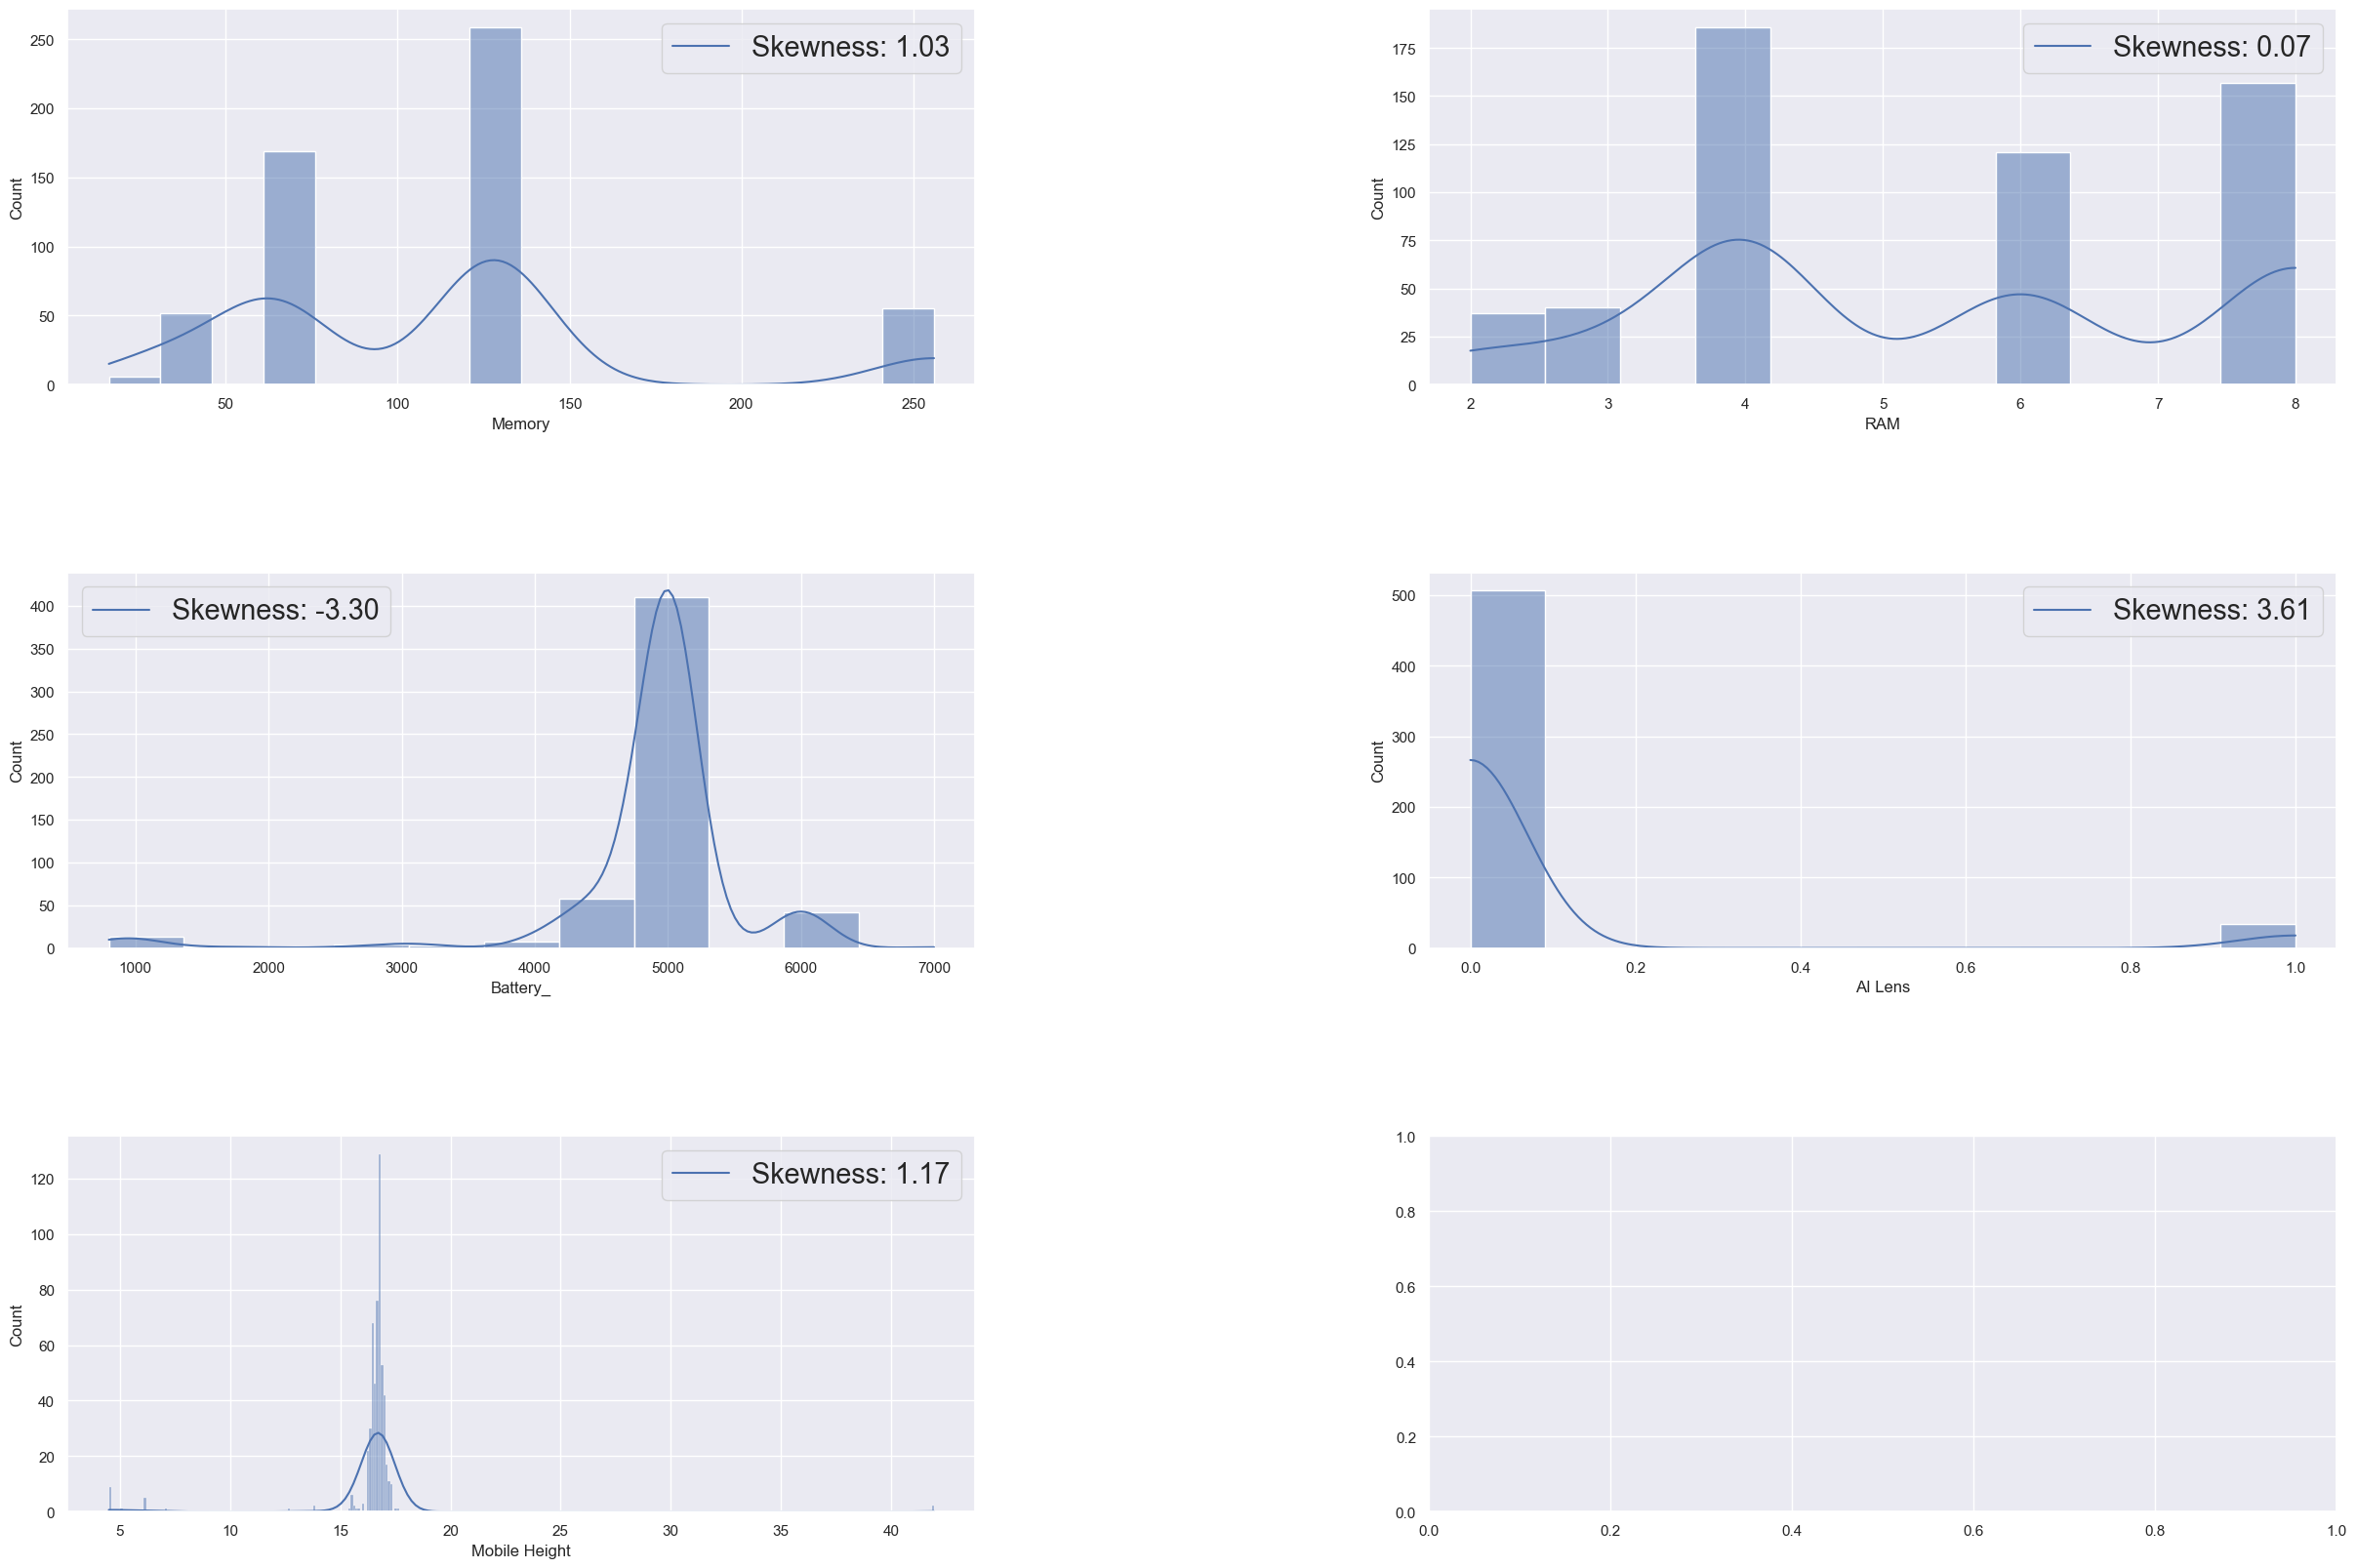

<Figure size 3000x2000 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

In [10]:
numerical_data = [feature for feature in df.columns if df[feature].dtypes != 'O']
fig, axes = plt.subplots(3, 2, figsize=(30, 20))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
axes = axes.flatten()

for i, ax in zip (df1[numerical_data], axes ): 
    plt.figure (figsize = (30,20))
    
    sns.histplot (df1 [i], kde = True, ax=ax)
    ax.legend(["Skewness: {:.2f}".format(df1[i].skew())], fontsize = 'xx-large')

<Axes: xlabel='Prize', ylabel='Count'>

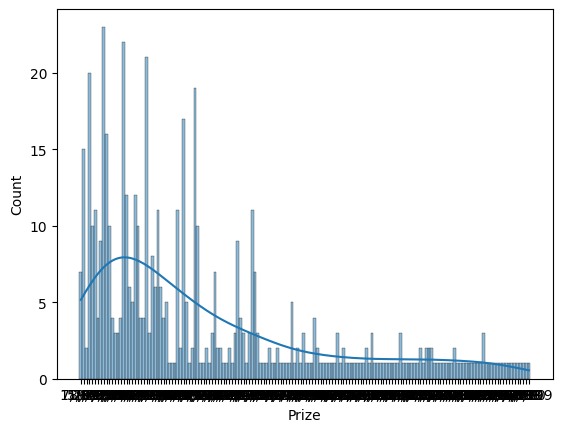

In [6]:
sns.histplot (df["Prize"], kde = True)


<Axes: xlabel='Prize', ylabel='Count'>

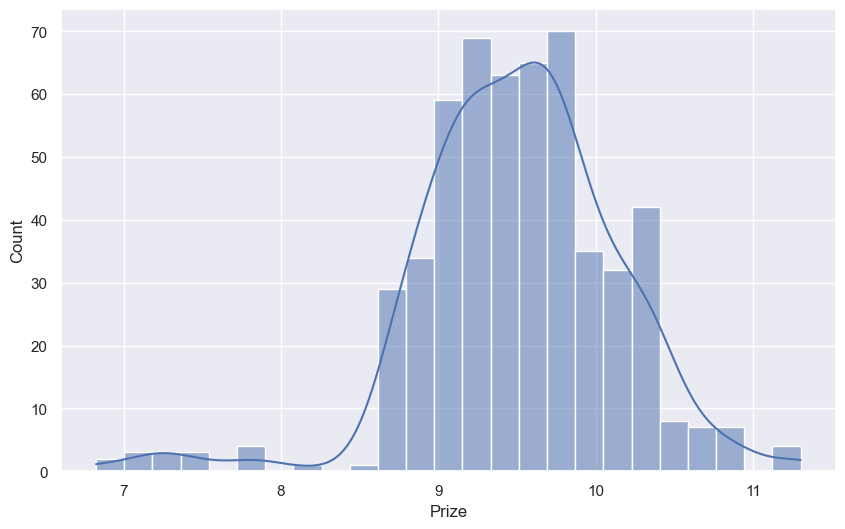

In [11]:
df1['Prize'] = df1['Prize'].str.replace(',', '')  # Remove commas
df1['Prize'] = pd.to_numeric(df1['Prize'], errors='coerce')
df1["Prize"] = np.log(df1["Prize"] + 1) 
df1["Prize"].skew ()
sns.histplot (df1["Prize"], kde = True)


In [10]:
df[numerical_data] = np.log(df[numerical_data] + 1) 
df[numerical_data].skew ()



Memory          -0.430231
RAM             -0.376935
Battery_        -5.014260
AI Lens          3.612638
Mobile Height   -4.502115
dtype: float64

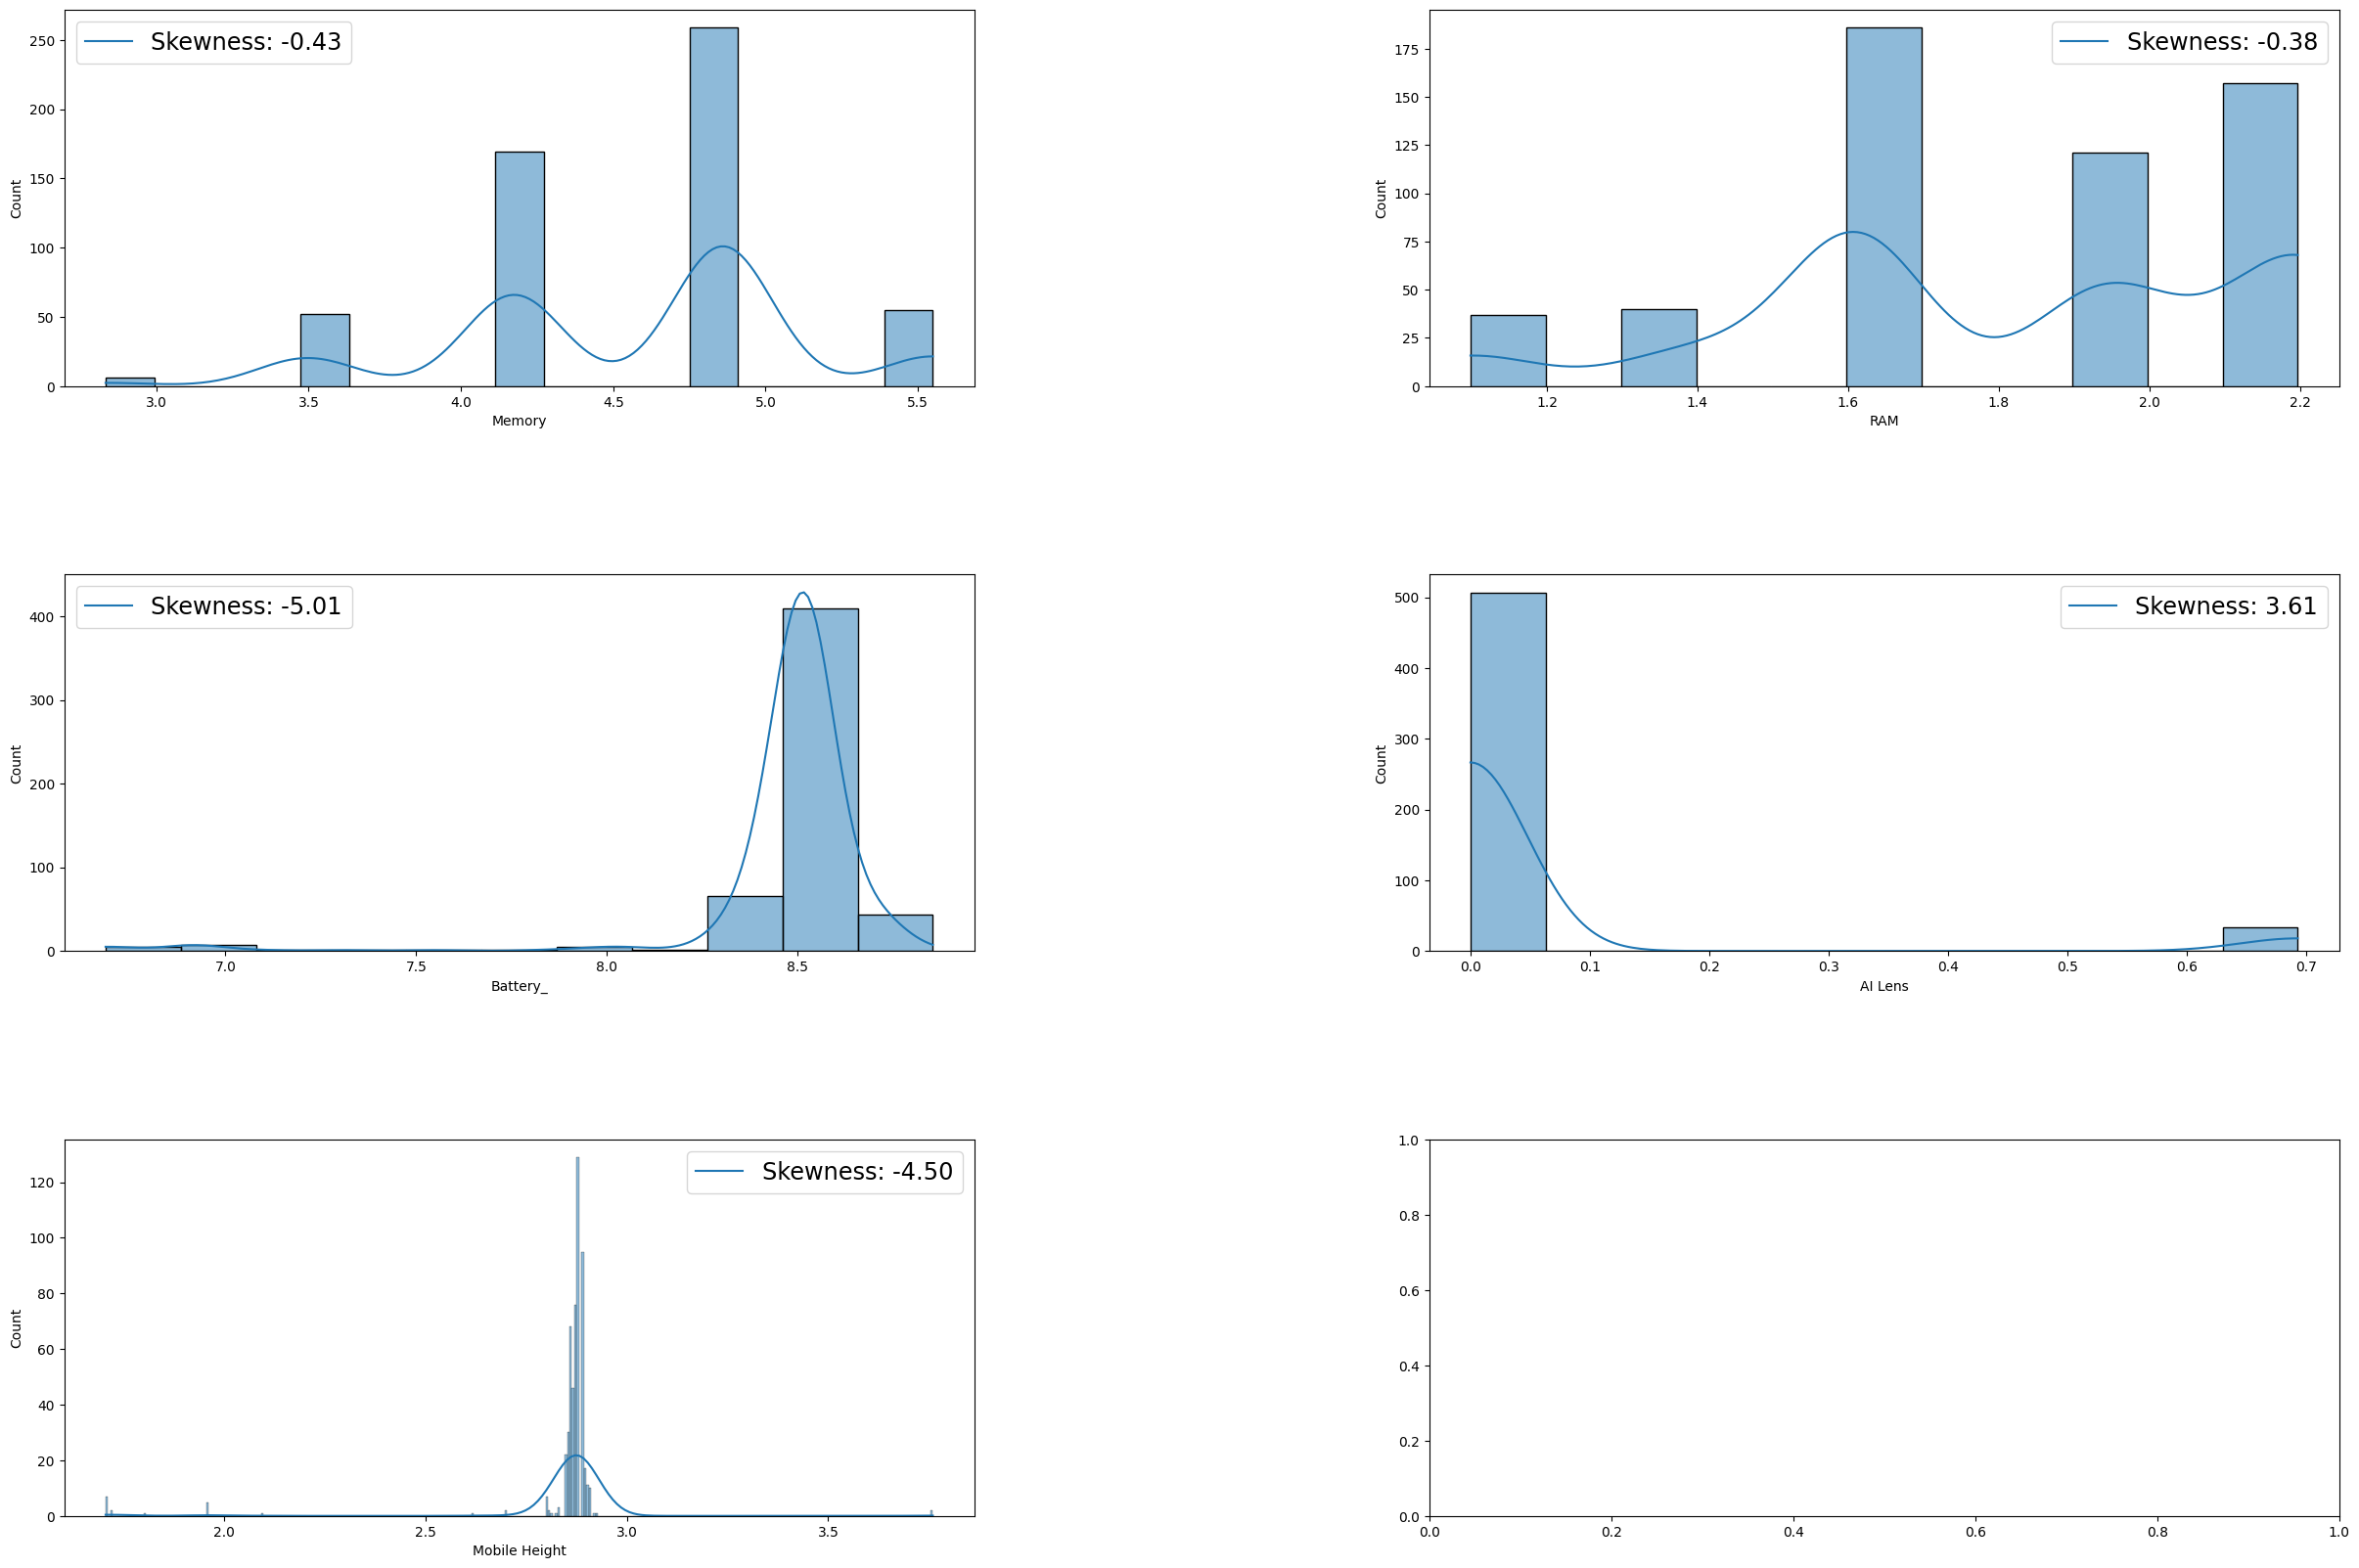

<Figure size 3000x2000 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

In [11]:
fig, axes = plt.subplots(3, 2, figsize=(30, 20))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
axes = axes.flatten()
for i, ax in zip (df [numerical_data], axes ): 
    plt.figure (figsize = (30,20))
    
    sns.histplot (df [i], kde = True, ax=ax)
    ax.legend(["Skewness: {:.2f}".format(df[i].skew())], fontsize = 'xx-large')

### PairPlot

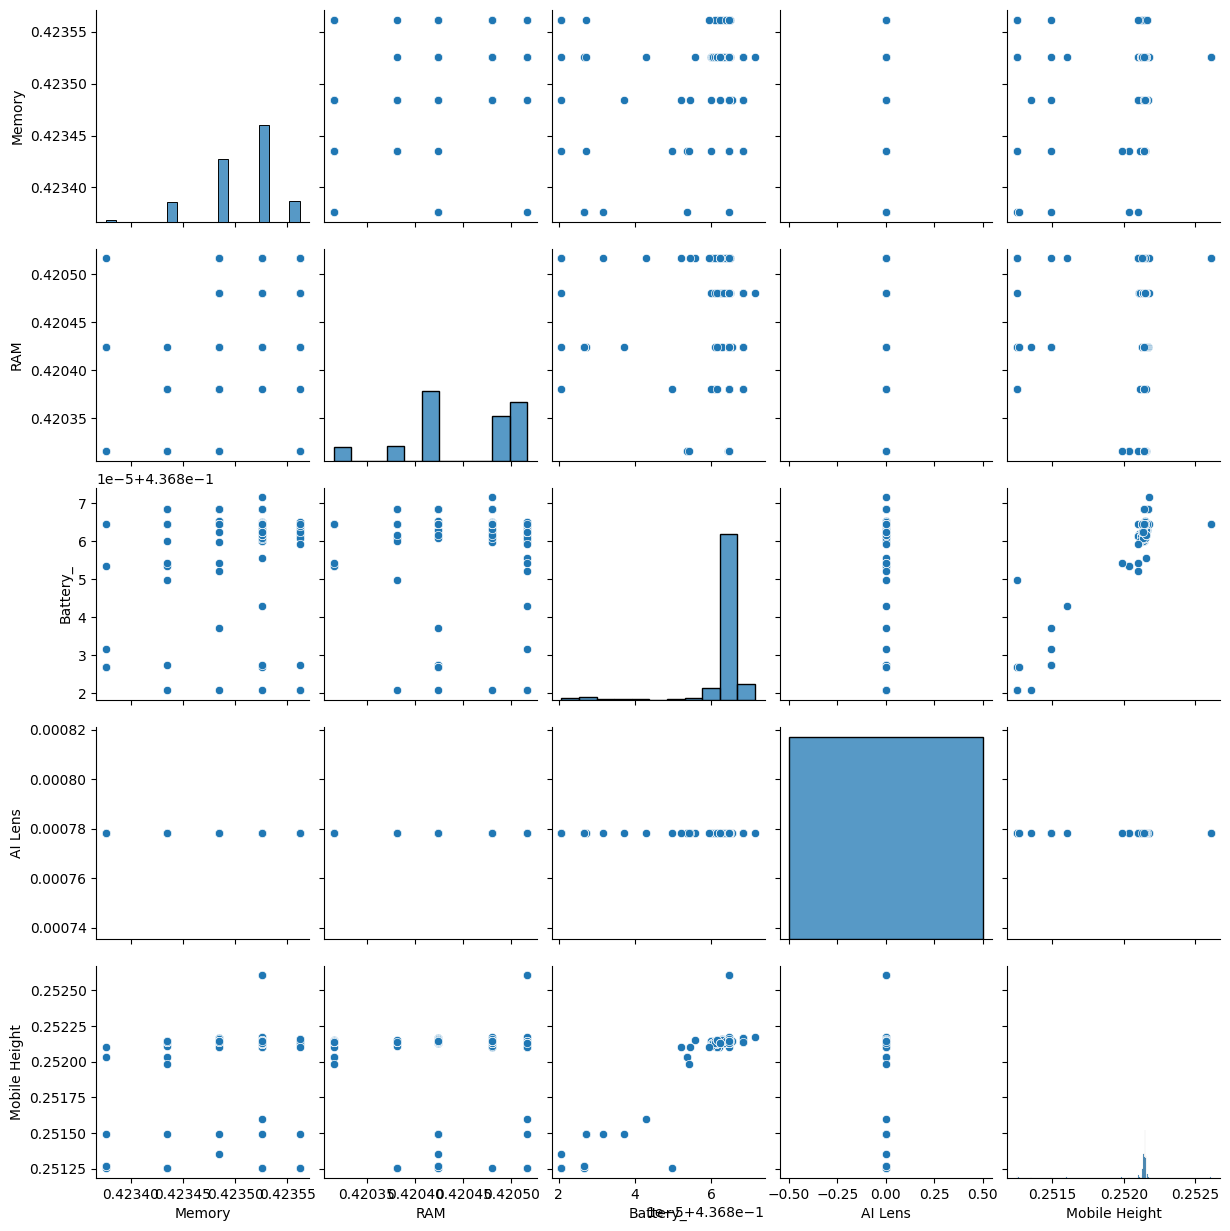

In [136]:
 sns.pairplot(data=df)

### Outliers

In [154]:
df1 = df [numerical_data].astype(float)

# Calculate quantiles
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

outliers1 = ((df1 < (Q1 - 1.5 * IQR)) | (df1> (Q3 + 1.5 * IQR))).any()

print (IQR)

print (outliers1)


Memory           0.000042
RAM              0.000093
Battery_         0.000000
AI Lens          0.000000
Mobile Height    0.000014
dtype: float64
Memory            True
RAM              False
Battery_          True
AI Lens          False
Mobile Height     True
dtype: bool


In [146]:
outliers = ((df [numerical_data] < (Q1 - 1.5 * IQR)) | (df[numerical_data]> (Q3 + 1.5 * IQR)))
outliers

,Memory,RAM,Battery_,AI Lens,Mobile Height
0,False,False,True,False,False
1,False,False,True,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


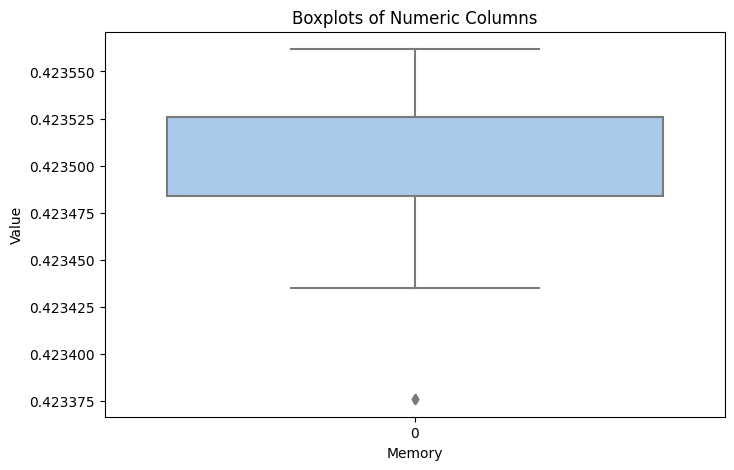

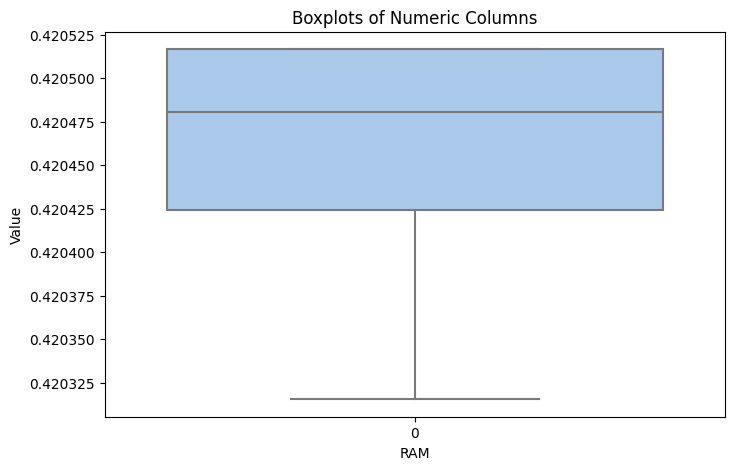

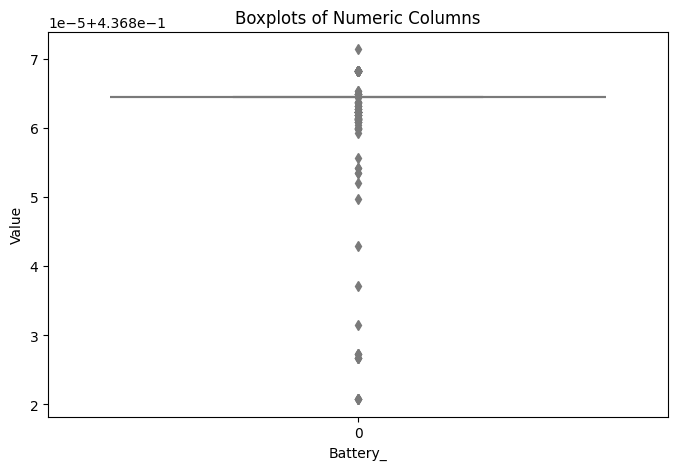

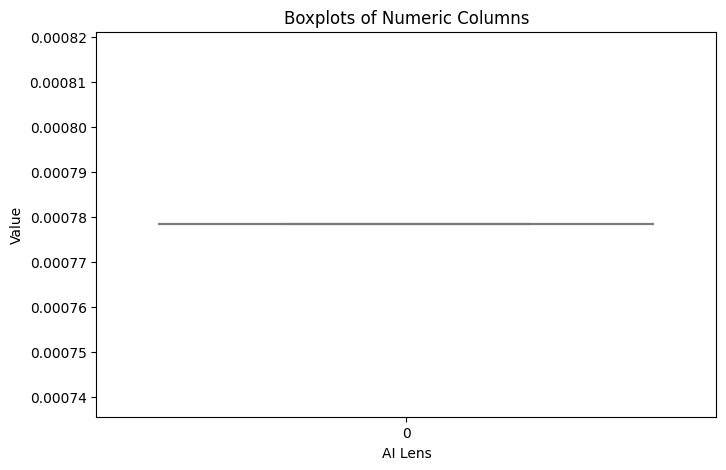

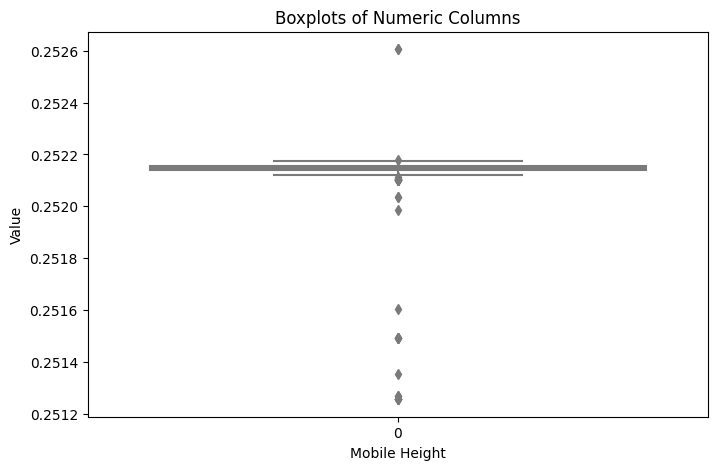

In [151]:
# Visualizing outliers
for i in df[numerical_data]:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data = df[i], palette='pastel')
    plt.title('Boxplots of Numeric Columns')
    plt.ylabel('Value')
    plt.xlabel (i)
    plt.show()

## Correlation 

In [13]:
corr = df[numerical_data].corr(method='pearson')
corr

,Memory,RAM,Battery_,AI Lens,Mobile Height
Memory,1.000000,0.625284,-0.053210,-0.094442,0.063163
RAM,0.625284,1.000000,-0.104923,-0.082622,0.092951
Battery_,-0.053210,-0.104923,1.000000,0.150156,0.695641
AI Lens,-0.094442,-0.082622,0.150156,1.000000,0.052018
Mobile Height,0.063163,0.092951,0.695641,0.052018,1.000000


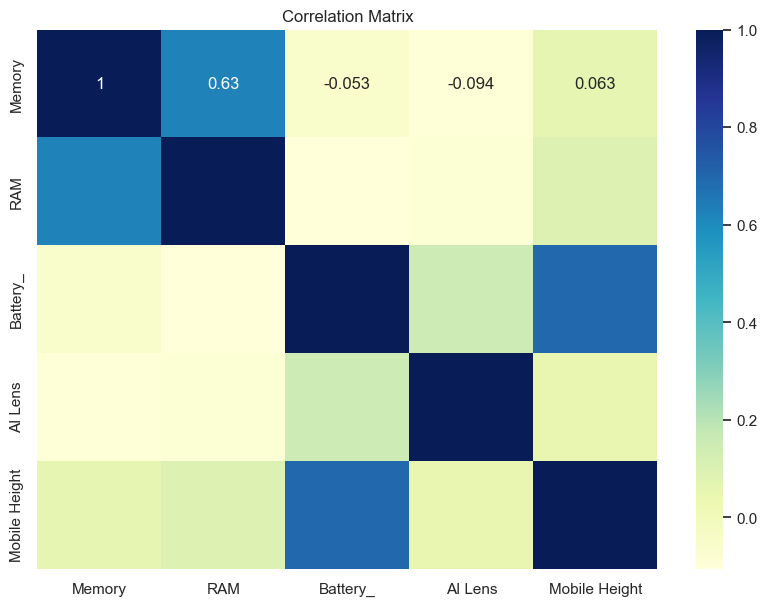

In [14]:
plt.figure(figsize=(10, 7))
sns.heatmap(corr , annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()

## Data profiling 

In [16]:
profile = ProfileReport (df)
profile.to_file (output_file = "Data.html" )

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Preprocessing

In [40]:
#df1['Mobile Height'] = df1['Mobile Height'].round().astype(int)
#df1.info ()

In [15]:
# Drop dependent feature
x= df1.drop (["Prize"], axis =1)

# select dependent feature
y= df1["Prize"]

In [16]:
numerical_data1 = x.select_dtypes(include = ['number'])
categorical_data1 = x.select_dtypes(include = ['object']).columns

In [17]:
# dummy varaibale
dummy_drop = []
clean_df = x
for i in categorical_data1:
    dummy_drop += [i + '_' + str(x[i].unique()[-1])]

x = pd.get_dummies(x, columns = categorical_data1)
x = x.drop(dummy_drop, axis = 1)
x.shape 

(541, 612)

In [9]:
x.head (1)

,Memory,RAM,Battery_,AI Lens,Mobile Height,Model_APPLE iPhone 11,Model_APPLE iPhone 12,Model_APPLE iPhone 14 Plus,Model_Google Pixel 6a,Model_Google Pixel 7,Model_Google Pixel 7a,Model_I Kall Z19Pro,Model_I Kall Z19Pro Flash blue,Model_IQOO Neo 7 5G,Model_Infinix HOT 12 Play,Model_Infinix HOT 20 5G,Model_Infinix HOT 20 Play,Model_Infinix HOT 30i,Model_Infinix Hot 11,Model_Infinix Hot 12,Model_Infinix Hot 12 Pro,Model_Infinix Hot 20 5G,Model_Infinix NOTE 12i,Model_Infinix Note 11s Free Fire Edition,Model_Infinix Note 12,Model_Infinix Note 12 5G,Model_Infinix Note 12 Pro,Model_Infinix Note 12 Pro 5G,Model_Infinix SMART 7,Model_Infinix Smart 5A,Model_Infinix Smart 6,Model_Infinix Smart 6 HD,Model_Infinix Smart 7 HD,Model_Infinix Zero 20,Model_Infinix Zero 5G 2023,Model_Infinix Zero 5G 2023 TURBO,Model_LAVA Z2,Model_LAVA Z21,Model_MOTOROLA Edge 30,Model_MOTOROLA Edge 30 Fusion,Model_MOTOROLA Edge 30 Ultra,Model_MOTOROLA Edge 40,Model_MOTOROLA G32,Model_MOTOROLA G42,Model_MOTOROLA G62 5G,Model_MOTOROLA e13,Model_MOTOROLA e22s,Model_MOTOROLA e32,Model_MOTOROLA e40,Model_MOTOROLA g13,Model_MOTOROLA g22,Model_MOTOROLA g31,Model_MOTOROLA g42,Model_MOTOROLA g52,Model_MOTOROLA g72,Model_MOTOROLA g73 5G,Model_MOTOROLA g82 5G,Model_Micromax 3,Model_Micromax IN 2C,Model_Nokia C01 Plus,Model_Nokia G11 Plus,Model_OPPO A17,Model_OPPO A17K,Model_OPPO A17k,Model_OPPO A77s,Model_OPPO A78 5G,Model_OPPO F21 Pro,Model_OPPO F21s Pro,Model_OPPO Reno8T 5G,Model_OnePlus 8,Model_OnePlus Nord,Model_OnePlus Nord 2T 5G,Model_POCO C31,Model_POCO C50,Model_POCO C51,Model_POCO C55,Model_POCO F1,Model_POCO F5 5G,Model_POCO M3 Pro 5G,Model_POCO M4 5G,Model_POCO M4 Pro,Model_POCO M4 Pro 5G,Model_POCO M5,Model_POCO X2,Model_POCO X4 Pro 5G,Model_POCO X5 5G,Model_POCO X5 Pro 5G,Model_REDMI 10,Model_REDMI 10 Prime 2022,Model_REDMI 10A SPORT,Model_REDMI 11 Prime,Model_REDMI 12c,Model_REDMI 9 Activ,Model_REDMI 9i,Model_REDMI A1+,Model_REDMI K50i 5G,Model_REDMI Note 10 Lite,Model_REDMI Note 10S,Model_REDMI Note 11,Model_REDMI Note 11S,Model_REDMI Note 11T 5G,Model_REDMI Note 12,Model_REDMI Note 12 5G,Model_REDMI Note 12 Pro 5G,Model_REDMI Note 12 Pro+ 5G,Model_REDMI Note 9,Model_Redmi 9A Sport,Model_SAMSUNG Galaxy A04,Model_SAMSUNG Galaxy A04e,Model_SAMSUNG Galaxy A13,Model_SAMSUNG Galaxy A14 5G,Model_SAMSUNG Galaxy A23,Model_SAMSUNG Galaxy A23 5G,Model_SAMSUNG Galaxy A34 5G,Model_SAMSUNG Galaxy A54 5G,Model_SAMSUNG Galaxy F04,Model_SAMSUNG Galaxy F13,Model_SAMSUNG Galaxy F14 5G,Model_SAMSUNG Galaxy F23 5G,Model_SAMSUNG Galaxy M04,Model_SAMSUNG Galaxy S21 FE 5G,Model_SAMSUNG Galaxy S22 Plus 5G,Model_SAMSUNG Galaxy S23 5G,Model_SAMSUNG Galaxy Z Flip3 5G,Model_SAMSUNG M53 5G,Model_Tecno Pop 5 Pro,Model_Tecno Pova 3,Model_Tecno Spark 8T,Model_Tecno Spark 9,Model_Tecno Spark 9T,Model_Tecno Spark Go 2023,Model_itel A60,Model_micromax,Model_micromax 1,Model_micromax 2,Model_micromax 3,Model_micromax1,Model_nothing phone 1,Model_realme 10,Model_realme 10 Pro 5G,Model_realme 10 Pro+ 5G,Model_realme 8,Model_realme 8i,Model_realme 9 5G,Model_realme 9 5G SE,Model_realme 9 Pro+ 5G,Model_realme 9i,Model_realme 9i 5G,Model_realme C11 2021,Model_realme C21Y,Model_realme C25s,Model_realme C30,Model_realme C30s,Model_realme C31,Model_realme C33,Model_realme C33 2023,Model_realme C35,Model_realme C55,Model_realme GT 2,Model_realme NARZO 50A PRIME,Model_realme Narzo 30,Model_realme Narzo 30 Pro 5G,Model_realme Narzo 50,Model_realme Narzo 50A,Model_realme Narzo 50A Prime,Model_realme Narzo 50i,Model_realme Narzo 50i Prime,Model_realme Narzo N55,Model_realme X3 SuperZoom,Model_realme narzo 50i Prime,Model_redmi max,Model_redmi min,Model_redmi mono,Model_vivo T1 44W,Model_vivo T1 Pro 5G,Model_vivo T2 5G,Model_vivo T2x 5G,Model_vivo V23 5G,Model_vivo V25 5G,Model_vivo V25 Pro 5G,Model_vivo V27 5G,Model_vivo Y100 5G,Model_vivo Y12G,Model_vivo Y16,Model_vivo Y1s,Model_vivo Y21T,Model_vivo Y33s,Model_vivo Y35,Model_vivo Y56 5G,Model_vivo Y565G,Model_vivo Y75,Colour_7Â° Purple,Colour_Agate Black,

In [18]:
feature_scale=[feature for feature in x.columns]
scaler=MinMaxScaler()
scaler.fit_transform(x)
X = pd.DataFrame(scaler.fit_transform(x),  columns=feature_scale)
X.head (2)

,Memory,RAM,Battery_,AI Lens,Mobile Height,Model_APPLE iPhone 11,Model_APPLE iPhone 12,Model_APPLE iPhone 14 Plus,Model_Google Pixel 6a,Model_Google Pixel 7,Model_Google Pixel 7a,Model_I Kall Z19Pro,Model_I Kall Z19Pro Flash blue,Model_IQOO Neo 7 5G,Model_Infinix HOT 12 Play,Model_Infinix HOT 20 5G,Model_Infinix HOT 20 Play,Model_Infinix HOT 30i,Model_Infinix Hot 11,Model_Infinix Hot 12,Model_Infinix Hot 12 Pro,Model_Infinix Hot 20 5G,Model_Infinix NOTE 12i,Model_Infinix Note 11s Free Fire Edition,Model_Infinix Note 12,Model_Infinix Note 12 5G,Model_Infinix Note 12 Pro,Model_Infinix Note 12 Pro 5G,Model_Infinix SMART 7,Model_Infinix Smart 5A,Model_Infinix Smart 6,Model_Infinix Smart 6 HD,Model_Infinix Smart 7 HD,Model_Infinix Zero 20,Model_Infinix Zero 5G 2023,Model_Infinix Zero 5G 2023 TURBO,Model_LAVA Z2,Model_LAVA Z21,Model_MOTOROLA Edge 30,Model_MOTOROLA Edge 30 Fusion,Model_MOTOROLA Edge 30 Ultra,Model_MOTOROLA Edge 40,Model_MOTOROLA G32,Model_MOTOROLA G42,Model_MOTOROLA G62 5G,Model_MOTOROLA e13,Model_MOTOROLA e22s,Model_MOTOROLA e32,Model_MOTOROLA e40,Model_MOTOROLA g13,Model_MOTOROLA g22,Model_MOTOROLA g31,Model_MOTOROLA g42,Model_MOTOROLA g52,Model_MOTOROLA g72,Model_MOTOROLA g73 5G,Model_MOTOROLA g82 5G,Model_Micromax 3,Model_Micromax IN 2C,Model_Nokia C01 Plus,Model_Nokia G11 Plus,Model_OPPO A17,Model_OPPO A17K,Model_OPPO A17k,Model_OPPO A77s,Model_OPPO A78 5G,Model_OPPO F21 Pro,Model_OPPO F21s Pro,Model_OPPO Reno8T 5G,Model_OnePlus 8,Model_OnePlus Nord,Model_OnePlus Nord 2T 5G,Model_POCO C31,Model_POCO C50,Model_POCO C51,Model_POCO C55,Model_POCO F1,Model_POCO F5 5G,Model_POCO M3 Pro 5G,Model_POCO M4 5G,Model_POCO M4 Pro,Model_POCO M4 Pro 5G,Model_POCO M5,Model_POCO X2,Model_POCO X4 Pro 5G,Model_POCO X5 5G,Model_POCO X5 Pro 5G,Model_REDMI 10,Model_REDMI 10 Prime 2022,Model_REDMI 10A SPORT,Model_REDMI 11 Prime,Model_REDMI 12c,Model_REDMI 9 Activ,Model_REDMI 9i,Model_REDMI A1+,Model_REDMI K50i 5G,Model_REDMI Note 10 Lite,Model_REDMI Note 10S,Model_REDMI Note 11,Model_REDMI Note 11S,Model_REDMI Note 11T 5G,Model_REDMI Note 12,Model_REDMI Note 12 5G,Model_REDMI Note 12 Pro 5G,Model_REDMI Note 12 Pro+ 5G,Model_REDMI Note 9,Model_Redmi 9A Sport,Model_SAMSUNG Galaxy A04,Model_SAMSUNG Galaxy A04e,Model_SAMSUNG Galaxy A13,Model_SAMSUNG Galaxy A14 5G,Model_SAMSUNG Galaxy A23,Model_SAMSUNG Galaxy A23 5G,Model_SAMSUNG Galaxy A34 5G,Model_SAMSUNG Galaxy A54 5G,Model_SAMSUNG Galaxy F04,Model_SAMSUNG Galaxy F13,Model_SAMSUNG Galaxy F14 5G,Model_SAMSUNG Galaxy F23 5G,Model_SAMSUNG Galaxy M04,Model_SAMSUNG Galaxy S21 FE 5G,Model_SAMSUNG Galaxy S22 Plus 5G,Model_SAMSUNG Galaxy S23 5G,Model_SAMSUNG Galaxy Z Flip3 5G,Model_SAMSUNG M53 5G,Model_Tecno Pop 5 Pro,Model_Tecno Pova 3,Model_Tecno Spark 8T,Model_Tecno Spark 9,Model_Tecno Spark 9T,Model_Tecno Spark Go 2023,Model_itel A60,Model_micromax,Model_micromax 1,Model_micromax 2,Model_micromax 3,Model_micromax1,Model_nothing phone 1,Model_realme 10,Model_realme 10 Pro 5G,Model_realme 10 Pro+ 5G,Model_realme 8,Model_realme 8i,Model_realme 9 5G,Model_realme 9 5G SE,Model_realme 9 Pro+ 5G,Model_realme 9i,Model_realme 9i 5G,Model_realme C11 2021,Model_realme C21Y,Model_realme C25s,Model_realme C30,Model_realme C30s,Model_realme C31,Model_realme C33,Model_realme C33 2023,Model_realme C35,Model_realme C55,Model_realme GT 2,Model_realme NARZO 50A PRIME,Model_realme Narzo 30,Model_realme Narzo 30 Pro 5G,Model_realme Narzo 50,Model_realme Narzo 50A,Model_realme Narzo 50A Prime,Model_realme Narzo 50i,Model_realme Narzo 50i Prime,Model_realme Narzo N55,Model_realme X3 SuperZoom,Model_realme narzo 50i Prime,Model_redmi max,Model_redmi min,Model_redmi mono,Model_vivo T1 44W,Model_vivo T1 Pro 5G,Model_vivo T2 5G,Model_vivo T2x 5G,Model_vivo V23 5G,Model_vivo V25 5G,Model_vivo V25 Pro 5G,Model_vivo V27 5G,Model_vivo Y100 5G,Model_vivo Y12G,Model_vivo Y16,Model_vivo Y1s,Model_vivo Y21T,Model_vivo Y33s,Model_vivo Y35,Model_vivo Y56 5G,Model_vivo Y565G,Model_vivo Y75,Colour_7Â° Purple,Colour_Agate Black,

### Split data

In [19]:
x_train, x_test, y_train, y_test = train_test_split (x,y, test_size = 0.2, random_state = 42)
x_train.shape, x_test.shape , y_train.shape, y_test.shape

((432, 612), (109, 612), (432,), (109,))

## Model Training and Testing

### Decision Tree Classifier

In [20]:
from sklearn.tree import export_graphviz  
dtc =DecisionTreeRegressor()
dtc.fit (x_train, y_train)

DecisionTreeRegressor()

In [21]:
y_pred = dtc.predict (x_test)
y_pred

array([ 9.04782144,  8.88183631,  9.87816974,  9.30565055,  9.46506011,
        9.58190393,  9.21034037,  9.79812704, 10.32548196,  8.87010105,
        9.10497986, 10.30895266,  9.87816974,  9.71111566, 10.40426284,
        9.74096862,  9.21034037,  9.680344  , 10.08580911,  9.85219426,
        8.85366543,  9.79812704,  9.21034037,  9.85219426, 10.23559313,
        9.39266193,  8.98607119, 10.08580911,  9.15904708,  8.98644654,
        9.76995616,  9.74096862,  7.22693602,  9.71111566, 10.40426284,
       11.30220443,  9.21034037,  9.79812704,  9.74096862,  9.10497986,
        9.85219426, 10.30895266,  9.87816974,  9.47193511,  8.69951475,
        9.54681261, 10.30895266,  9.26378635,  9.10497986,  8.79482493,
        9.680344  , 10.23995979,  9.02268461,  8.98719682,  9.10453531,
        9.50970395,  9.90348755, 10.23995979,  9.54681261,  9.39266193,
        9.43348392, 10.16585182,  8.74830491, 10.93310697,  8.85066092,
        9.02268461,  9.680344  ,  9.9522301 ,  9.10497986,  9.58

In [22]:
import graphviz
from sklearn.tree import export_graphviz  
# Export the decision tree to a .dot file
export_graphviz(dtc, out_file='tree.dot', feature_names=x.columns, filled=True, rounded=True, special_characters=True)

# Use graphviz to convert the .dot file to a visualization
with open("tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

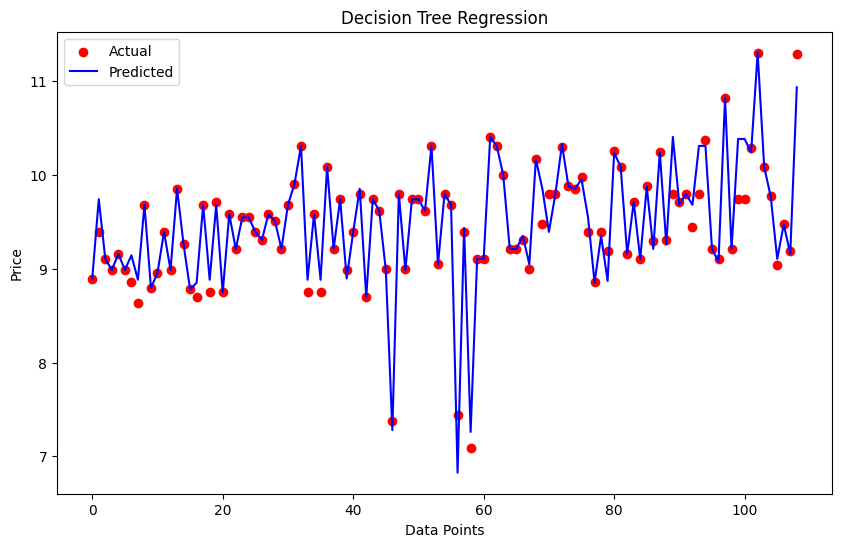

In [21]:
# Sort the values for better plotting
sorted_indices = np.argsort(x_test.index)
x_test_sorted = x_test.iloc[sorted_indices]
y_test_sorted = y_test.iloc[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test_sorted)), y_test_sorted, color='red', label='Actual')
plt.plot(range(len(y_test_sorted)), y_pred_sorted, color='blue', label='Predicted')
plt.xlabel('Data Points')
plt.ylabel('Price')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()


## Lasso

In [23]:
### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(x_train, y_train)


SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [24]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [25]:
# let's print the number of total and selected features
sel_ = SelectFromModel(feature_sel_model, prefit=True)
# this is how we can make a list of the selected features
selected_feat = x_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_== 0)))
    

total features: 612
selected features: 18
features with coefficients shrank to zero: 594


In [48]:
selected_feat

Index(['Memory', 'RAM', 'AI Lens', 'Model_Google Pixel 7', 'Rear Camera_0MP',
       'Rear Camera_12MP', 'Rear Camera_13MP', 'Rear Camera_64MP',
       'Rear Camera_8MP', 'Front Camera_0MP', 'Front Camera_32MP',
       'Front Camera_5MP', 'Front Camera_8MP', 'Processor__Google Tensor G2',
       'Processor__Mediatek Helio P35', 'Processor__Qualcomm Snapdragon 680',
       'Processor__SC6531E'],
      dtype='object')

## Evaluate model

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0282
- Mean Absolute Error: 0.0136
- R2 Score: 0.9980
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2190605.7895
- Mean Absolute Error: 939711.2676
- R2 Score: -11963862942786.3672


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.4815
- Mean Absolute Error: 0.3376
- R2 Score: 0.4279
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4134
- Mean Absolute Error: 0.3047
- R2 Score: 0.5740


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0613
- Mean Absolute Error: 0.0435
- R2 Score: 0.9907
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1886
- Mean Absolute Error: 0.0966
- R2 Score: 0.9114


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0109
- Mean Absolute Error: 0.0012
- R2 Score: 0.9997
------

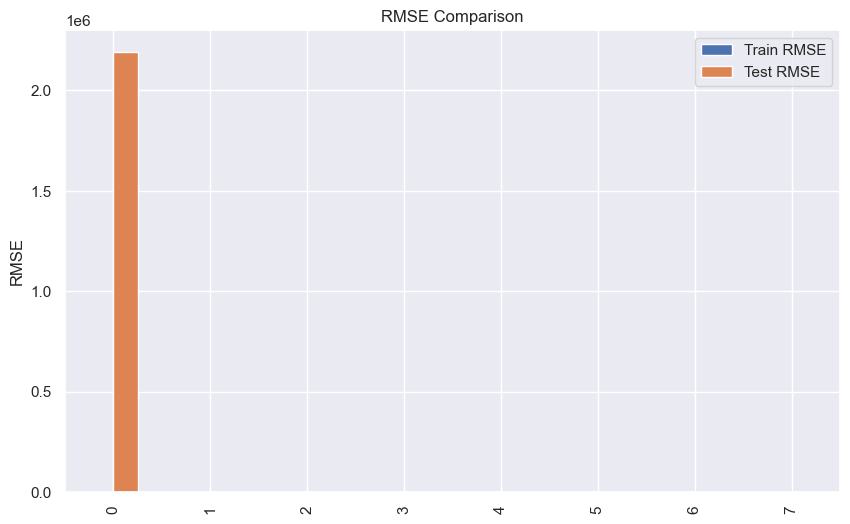

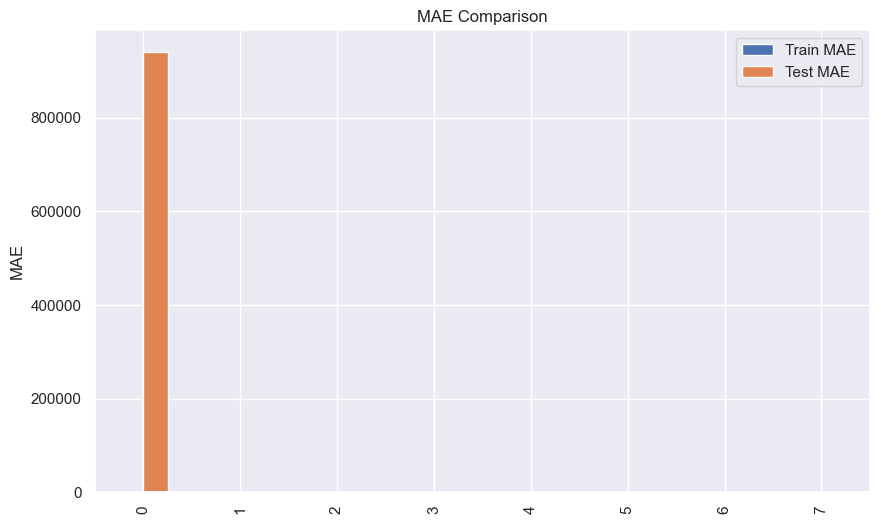

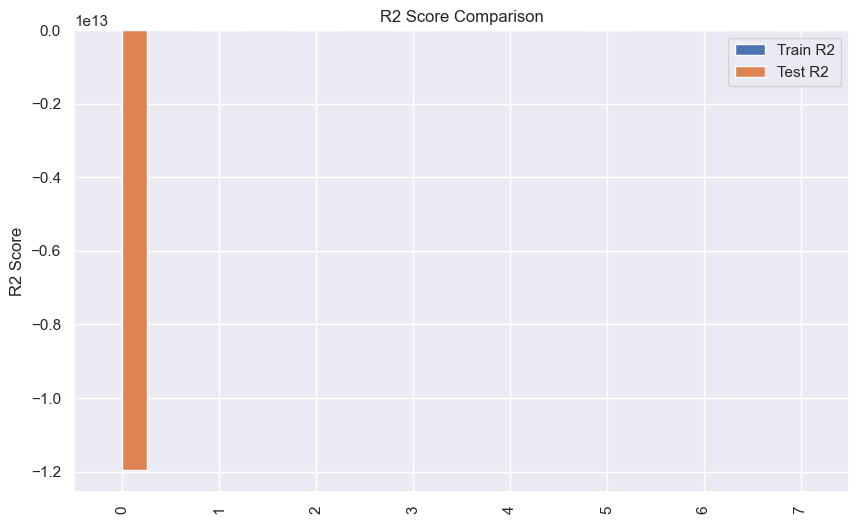

In [25]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]
results = {}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    results[i] = {
        'Train RMSE': np.sqrt(mean_squared_error(y_train,  y_train_pred)),
        'Train MAE': mean_absolute_error(y_train,  y_train_pred),
        'Train R2': r2_score(y_train,  y_train_pred),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'Test MAE': mean_absolute_error(y_test, y_test_pred),
        'Test R2': r2_score(y_test, y_test_pred)
    }
    
     
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')
# Plotting performance metrics for models
metrics_df = pd.DataFrame(results).T
metrics_df[['Train RMSE', 'Test RMSE']].plot(kind='bar', figsize=(10, 6))
plt.title('RMSE Comparison')
plt.ylabel('RMSE')
plt.savefig('rmse_comparison.png')
plt.show()

metrics_df[['Train MAE', 'Test MAE']].plot(kind='bar', figsize=(10, 6))
plt.title('MAE Comparison')
plt.ylabel('MAE')
plt.savefig('mae_comparison.png')
plt.show()

metrics_df[['Train R2', 'Test R2']].plot(kind='bar', figsize=(10, 6))
plt.title('R2 Score Comparison')
plt.ylabel('R2 Score')
plt.savefig('r2_comparison.png')
plt.show()

## Cross Validation 

In [26]:
from sklearn.model_selection import cross_val_score, cross_validate
for i in models :
    scores = cross_validate(models[i], x , y, scoring="neg_mean_squared_error", cv=10, return_train_score=True)
    test_neg_mse_scores = scores['test_score']
    rmse_scores = np.sqrt(-test_neg_mse_scores)

    print ("model Name : ", models[i], "=" ,  "rmse score : ", rmse_scores )


model Name :  LinearRegression() = rmse score :  [4.43985361e+06 3.39183265e+08 1.19091307e+08 2.88694171e+06
 3.10477189e+06 5.83992017e+07 1.08975670e+08 1.76254792e+07
 5.65134864e+07 1.41729604e+08]
model Name :  Lasso() = rmse score :  [0.43853789 0.34451699 0.73730723 0.30755479 0.49005309 0.455514
 0.39823395 0.52462768 0.50408347 0.66141377]
model Name :  Ridge() = rmse score :  [0.18360746 1.236756   0.19794477 0.12268372 0.26876611 0.16435954
 0.22223976 0.35867815 0.22140684 0.4114263 ]
model Name :  DecisionTreeRegressor() = rmse score :  [0.22545447 0.10737289 0.2282734  0.19445442 0.16975626 0.29380886
 0.2061418  0.2774302  0.19678714 0.36289381]
model Name :  RandomForestRegressor() = rmse score :  [0.22594952 0.1019387  0.37013294 0.13897534 0.2747443  0.18050203
 0.18346151 0.25460083 0.18972339 0.35708664]
model Name :  XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
            

### Accuracy

In [27]:
for i in models :
    model = models [i]
    model .fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = r2_score(y_test, y_pred)*100
    print(" Accuracy of the", models[i], "is %.2f" %score)

 Accuracy of the LinearRegression() is -1196386294278636.75
 Accuracy of the Lasso() is 57.40
 Accuracy of the Ridge() is 91.14
 Accuracy of the DecisionTreeRegressor() is 94.21
 Accuracy of the RandomForestRegressor() is 93.75
 Accuracy of the XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) is 92.09
 Accuracy of the <catboost.core.CatBoostRegressor object 

### Visualization

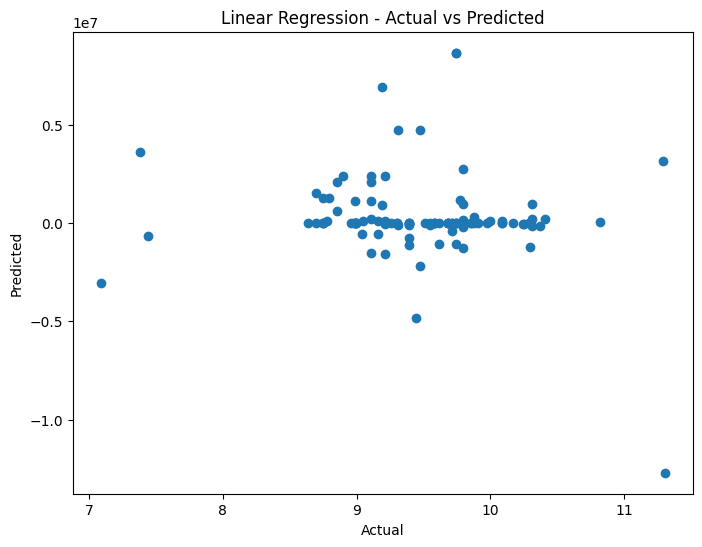

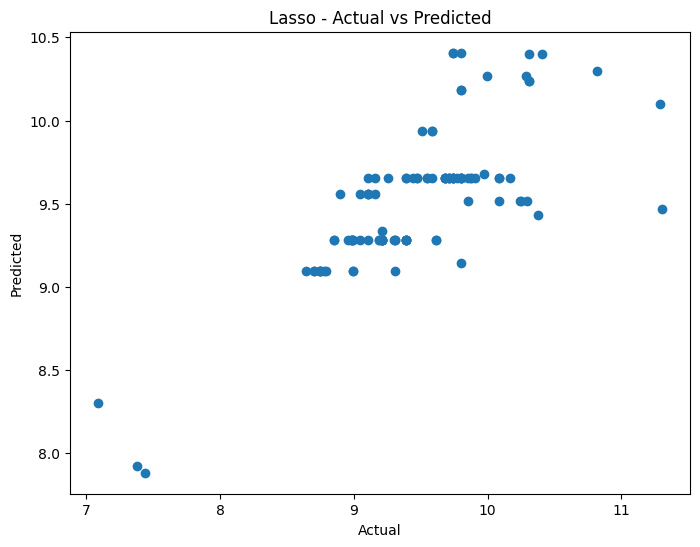

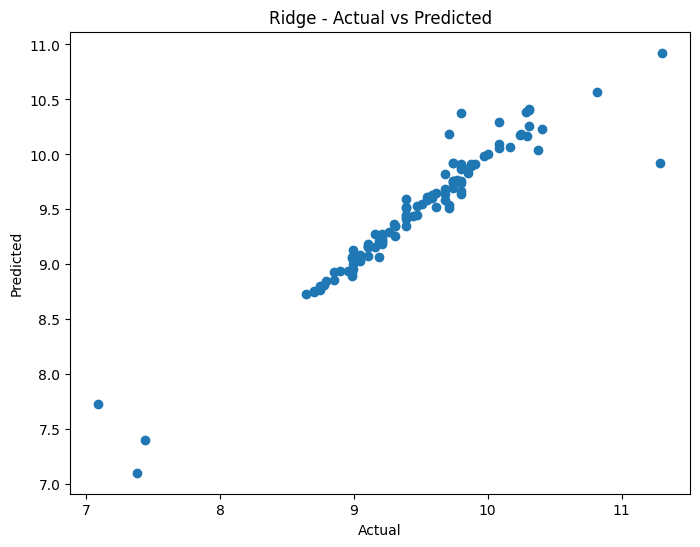

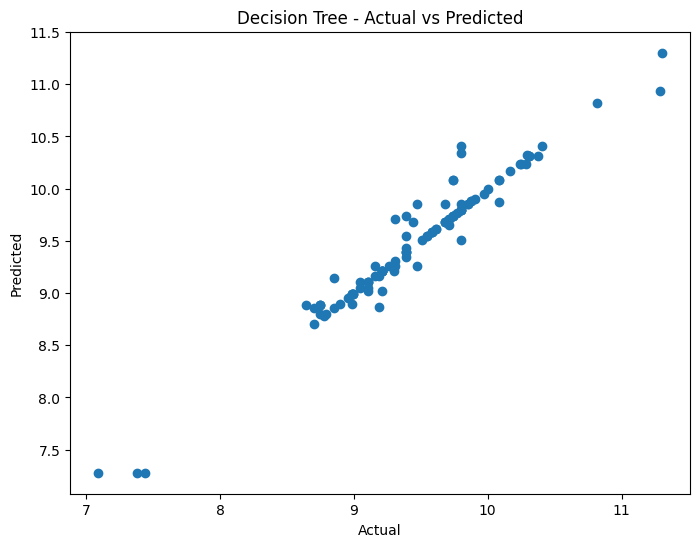

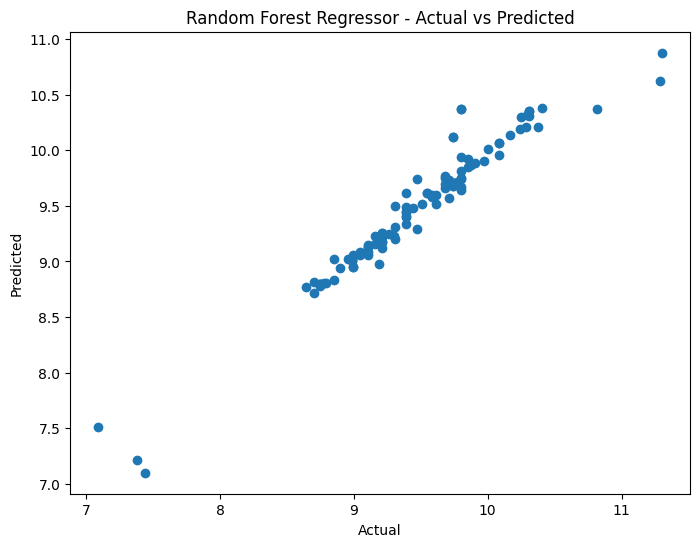

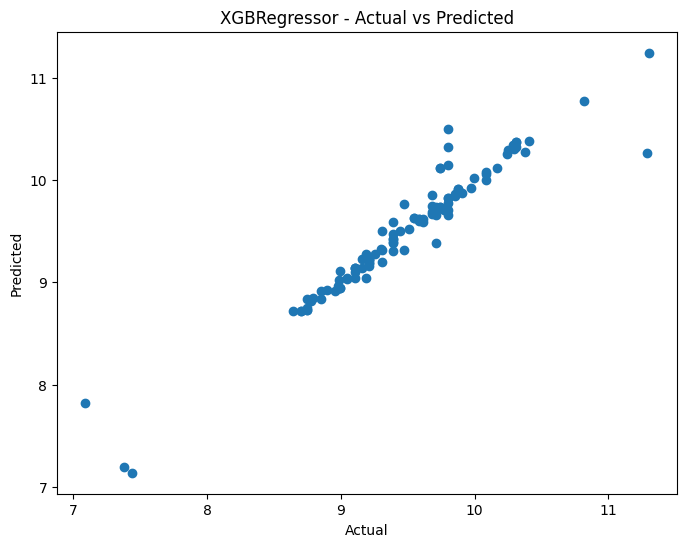

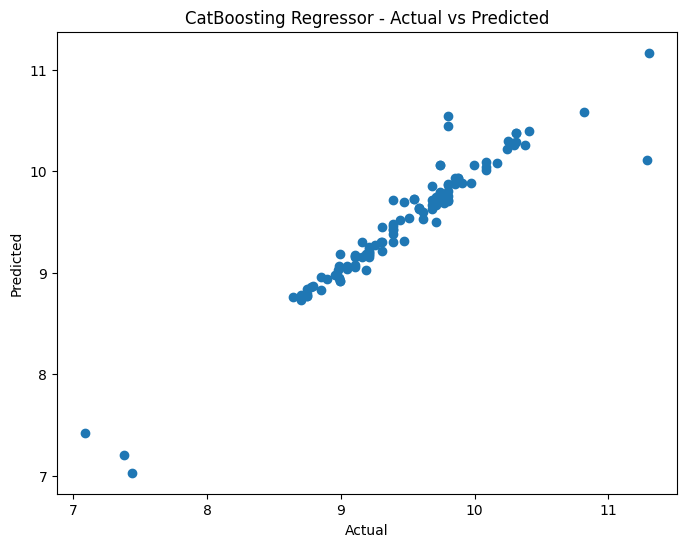

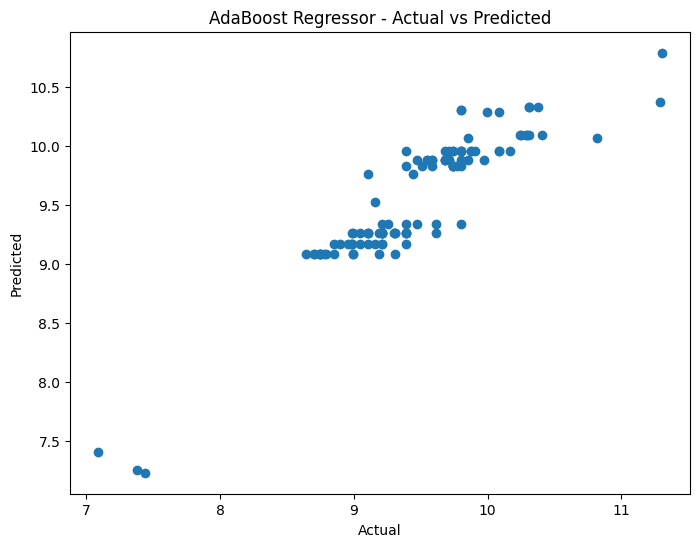

In [64]:
for i in models:
    model = models [i]
    model.fit(x_train, y_train)  # Train model
    y_pred = model.predict(x_test)  # Make predictions
    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{i} - Actual vs Predicted')
    
    plt.show()

## Result 

In [38]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
3,Decision Tree,9.496581e-01
4,Random Forest Regressor,9.354761e-01
5,XGBRegressor,9.208615e-01
6,CatBoosting Regressor,9.166582e-01
2,Ridge,9.113502e-01
7,AdaBoost Regressor,8.172024e-01
1,Lasso,5.739790e-01
0,Linear Regression,-1.196386e+13


### Difference betweem actual and predicted 

In [39]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
229,9.047821,9.047821,0.000000e+00
73,8.748305,8.881836,-1.335314e-01
352,9.878170,9.878170,0.000000e+00
86,9.305651,9.305651,0.000000e+00
470,9.441452,9.680344,-2.388919e-01
77,9.581904,9.581904,0.000000e+00
297,9.210340,9.210340,0.000000e+00
468,9.798127,9.798127,0.000000e+00
342,10.292146,10.325482,-3.333642e-02
384,9.189219,8.870101,3.191178e-01


# Conclusion 

Best Performers: The Decision Tree Regressor and Random Forest Regressor demonstrated the best performance on both the training and test sets, with R² scores of 0.9418 and 0.9359 respectively. These models are robust and generalize well to unseen data.
Ridge Regression also performed well with an R² score of 0.9114 on the test set, making it a viable option.
XGBRegressor and CatBoosting Regressor also showed strong performance, with R² scores of 0.9209 and 0.9167 respectively, indicating their effectiveness for this task.
Linear Regression and Lasso Regression did not perform well, indicating that they are not suitable for this dataset without significant modifications or improvements.

Preferred Models: For future work on this dataset, it is recommended to use the Decision Tree Regressor, Random Forest Regressor, XGBRegressor, or CatBoosting Regressor due to their strong performance and generalization capabilities.
Further Improvements: Consider tuning hyperparameters and experimenting with feature engineering to further improve model performance. Additionally, exploring ensemble methods and other advanced regression techniques could yield even better results.